# Terra One Coding Challenge – Day-Ahead Price Forecasting

 **Author:** Spoorthy Siddannaiah  

 **Date:** October 2025  

 **Objective:** design and implement different models for forecasting day-ahead prices.


# Task 1: Exploratory Analysis of Day-Ahead Electricity Prices

This notebook demonstrates the initial exploration of the dataset, including:
- Loading and understanding the data
- Checking for missing values and basic statistics
- Visualizing correlations between features
- Preparing the dataset for further modeling

The goal is to gain insights into the dataset and identify patterns that may help in predicting day-ahead auction prices.


## Load and Inspect Dataset


Shape of dataset: (43847, 7)

Columns in dataset: ['demand-forecast', 'temperature-normal', 'temperature-forecast', 'solar-forecast', 'day-ahead-auction-price', 'wind-forecast', 'day-ahead-auction-time']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43847 entries, 2020-01-01 01:00:00+01:00 to 2024-12-31 23:00:00+01:00
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   demand-forecast          43847 non-null  float64
 1   temperature-normal       43847 non-null  float64
 2   temperature-forecast     43847 non-null  float64
 3   solar-forecast           43847 non-null  float64
 4   day-ahead-auction-price  43847 non-null  float64
 5   wind-forecast            43847 non-null  float64
 6   day-ahead-auction-time   43847 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.7+ MB

First 5 rows:


,demand-forecast,temperature-normal,temperature-forecast,solar-forecast,day-ahead-auction-price,wind-forecast,day-ahead-auction-time
contract-delivery,,,,,,,
2020-01-01 01:00:00+01:00,43471.50,1.32,0.60,0.00,38.60,7019.50,2019-12-31 11:00:00+00:00
2020-01-01 02:00:00+01:00,42555.50,1.29,0.30,0.00,36.55,7407.00,2019-12-31 11:00:00+00:00
2020-01-01 03:00:00+01:00,42448.25,1.22,-0.10,0.00,32.32,7540.50,2019-12-31 11:00:00+00:00
2020-01-01 04:00:00+01:00,42567.75,1.17,-0.40,0.00,30.85,7802.75,2019-12-31 11:00:00+00:00
2020-01-01 05:00:00+01:00,42209.00,1.10,-0.70,0.00,30.14,7805.75,2019-12-31 11:00:00+00:00



Summary statistics:


,demand-forecast,temperature-normal,temperature-forecast,solar-forecast,day-ahead-auction-price,wind-forecast
count,43847.00,43847.00,43847.00,43847.00,43847.00,43847.00
mean,54168.83,10.03,11.17,6110.83,107.45,14793.63
std,9232.67,6.72,7.43,9450.02,105.71,10952.12
min,30544.75,-0.12,-11.20,0.00,-500.00,46.50
25%,46634.62,3.53,5.40,1.50,41.35,5880.00
50%,54049.25,9.71,10.60,188.25,81.74,11889.75
75%,61762.12,15.60,16.80,9680.12,129.70,21702.50
max,77585.75,23.70,34.50,48572.50,2325.83,52399.00



Missing values per column:
demand-forecast            0
temperature-normal         0
temperature-forecast       0
solar-forecast             0
day-ahead-auction-price    0
wind-forecast              0
day-ahead-auction-time     0
dtype: int64

Correlation matrix (rounded):
                         day-ahead-auction-price  demand-forecast  \
day-ahead-auction-price                     1.00             0.19   
demand-forecast                             0.19             1.00   
wind-forecast                              -0.29             0.11   
solar-forecast                             -0.11             0.30   
temperature-forecast                        0.01            -0.10   
temperature-normal                          0.06            -0.12   

                         wind-forecast  solar-forecast  temperature-forecast  \
day-ahead-auction-price          -0.29           -0.11                  0.01   
demand-forecast                   0.11            0.30                 -0.10   
w

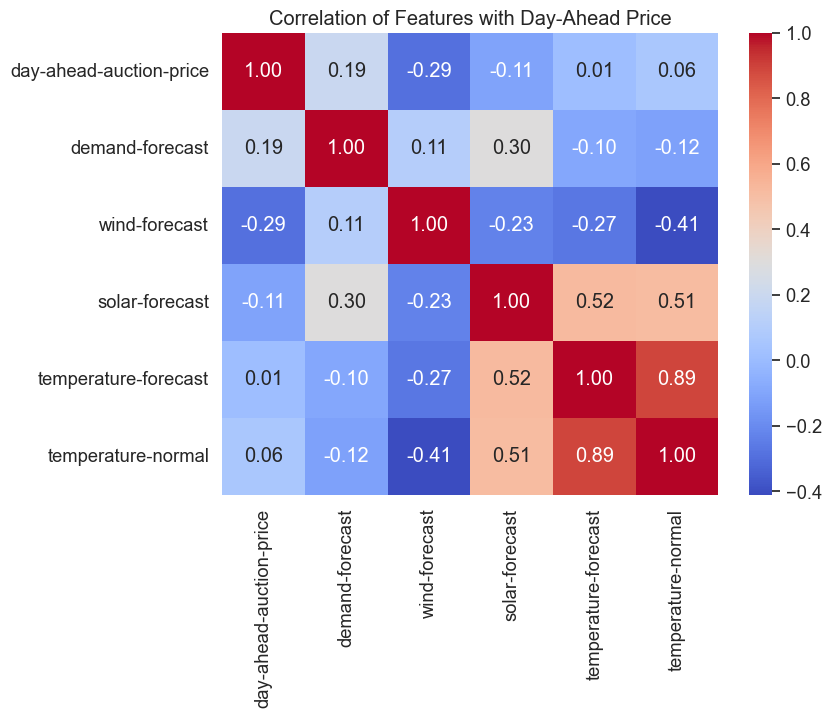

In [876]:
# ================================
# Step 3: Load and Inspect Dataset
# ================================

# --- Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Display settings for better readability ---
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# --- Load Dataset ---
file_path = "/Users/spoorthysiddannaiah/Downloads/terra_one_coding/ml-engineer-dataset.csv"
df = pd.read_csv(file_path)

# --- Convert timestamp to local time (CET/Berlin) and set as index ---
# Why? So that hourly and daily patterns reflect local time

df['contract-delivery'] = pd.to_datetime(df['contract-delivery'], utc=True).dt.tz_convert('Europe/Berlin')
df = df.set_index('contract-delivery')

# --- Quick Overview ---
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())

print("\nDataset info:")
df.info()

print("\nFirst 5 rows:")
display(df.head())

# --- Summary Statistics ---
print("\nSummary statistics:")
display(df.describe())

# --- Check for Missing Values ---
print("\nMissing values per column:")
print(df.isna().sum())

# -- Visualize correlations among key features ---
cols = ['day-ahead-auction-price', 'demand-forecast', 
        'wind-forecast', 'solar-forecast', 'temperature-forecast', 'temperature-normal']

corr = df[cols].corr()
print("\nCorrelation matrix (rounded):")
print(corr.round(2))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Features with Day-Ahead Price")
plt.show()


In [879]:
df

,demand-forecast,temperature-normal,temperature-forecast,solar-forecast,day-ahead-auction-price,wind-forecast,day-ahead-auction-time
contract-delivery,,,,,,,
2020-01-01 01:00:00+01:00,43471.50,1.32,0.60,0.00,38.60,7019.50,2019-12-31 11:00:00+00:00
2020-01-01 02:00:00+01:00,42555.50,1.29,0.30,0.00,36.55,7407.00,2019-12-31 11:00:00+00:00
2020-01-01 03:00:00+01:00,42448.25,1.22,-0.10,0.00,32.32,7540.50,2019-12-31 11:00:00+00:00
2020-01-01 04:00:00+01:00,42567.75,1.17,-0.40,0.00,30.85,7802.75,2019-12-31 11:00:00+00:00
2020-01-01 05:00:00+01:00,42209.00,1.10,-0.70,0.00,30.14,7805.75,2019-12-31 11:00:00+00:00
...,...,...,...,...,...,...,...
2024-12-31 19:00:00+01:00,56083.25,2.06,0.90,0.00,67.77,32407.00,2024-12-30 11:00:00+00:00
2024-12-31 20:00:00+01:00,53423.00,1.88,0.90,0.00,35.56,33725.00,2024-12-30 11:00:00+00:00
2024-12-31 21:00:00+01:00,50937.50,1.73,1.10,0.00,15.70,34342.00,2024-12-30 11:00:00+00:00


## Temporal Feature Engineering


In [880]:
# ================================
# Step 4: Extract Hour and Day of Week
# ================================

# Extract hour and day of week from the datetime index
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek  # Monday=0, Sunday=6

# Quick check
df[['hour', 'dayofweek']].head()


,hour,dayofweek
contract-delivery,,
2020-01-01 01:00:00+01:00,1,2
2020-01-01 02:00:00+01:00,2,2
2020-01-01 03:00:00+01:00,3,2
2020-01-01 04:00:00+01:00,4,2
2020-01-01 05:00:00+01:00,5,2


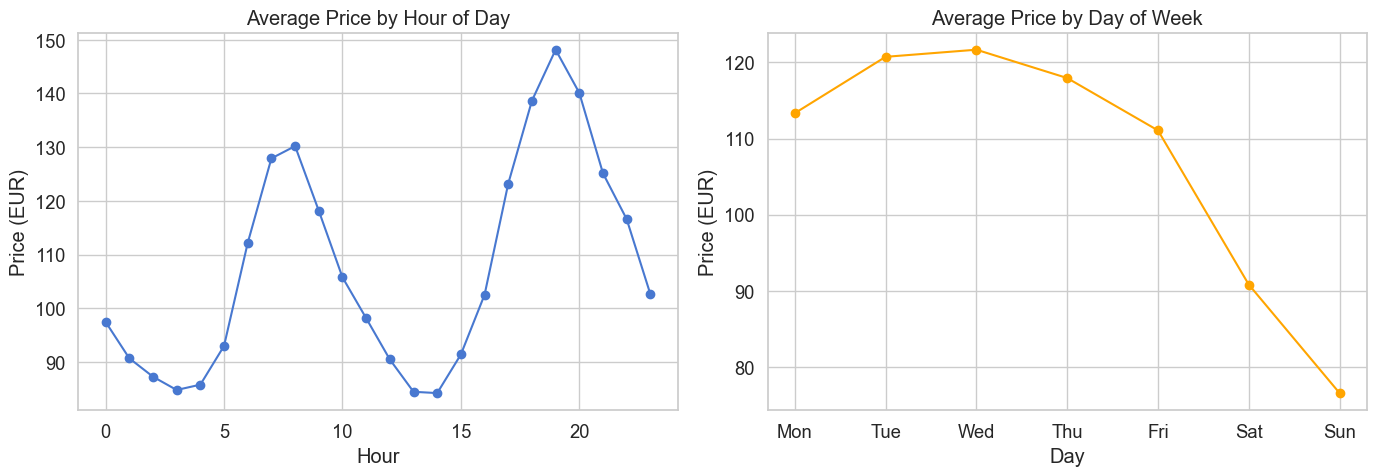

In [882]:
# --- Step 4: Price vs. Hour / Day-of-Week Analysis ---
# Compute average price by hour and day of week
hourly_avg = df.groupby('hour')['day-ahead-auction-price'].mean()
dow_avg = df.groupby('dayofweek')['day-ahead-auction-price'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Hourly price
axes[0].plot(hourly_avg.index, hourly_avg.values, marker='o')
axes[0].set_title('Average Price by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Price (EUR)')
axes[0].grid(True)

# Day-of-week price
day_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
axes[1].plot(dow_avg.index, dow_avg.values, marker='o', color='orange')
axes[1].set_title('Average Price by Day of Week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Price (EUR)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_labels)
axes[1].grid(True)

plt.tight_layout()
plt.show()


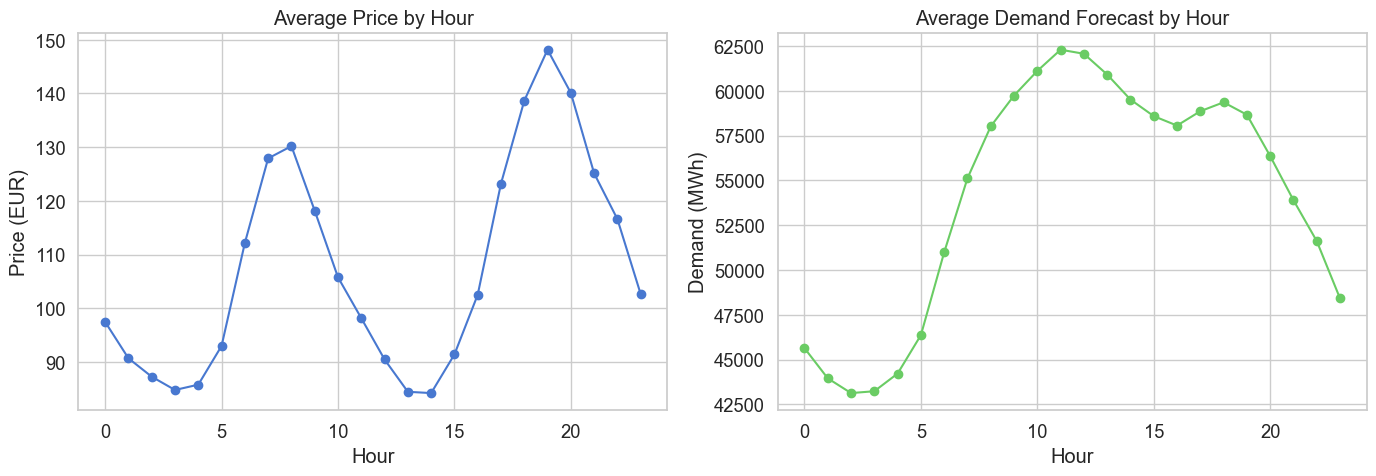

In [883]:
# --- Step 5: Price vs. Demand Analysis ---
hourly_price = df.groupby('hour')['day-ahead-auction-price'].mean()
hourly_demand = df.groupby('hour')['demand-forecast'].mean()

fig, axes = plt.subplots(1,2,figsize=(14,5))

axes[0].plot(hourly_price.index, hourly_price.values, marker='o', color='b')
axes[0].set_title('Average Price by Hour')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Price (EUR)')
axes[0].grid(True)

axes[1].plot(hourly_demand.index, hourly_demand.values, marker='o', color='g')
axes[1].set_title('Average Demand Forecast by Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Demand (MWh)')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Prices are typically lowest during the early morning hours, rise strongly to a morning peak (around 8–9 AM), decrease mid-day, and then climb to a second, higher evening peak (around 7–8 PM). This reflects typical power system demand cycles, with prices tracking morning and evening demand surges.


Prices are highest midweek (Tuesday–Wednesday), then gently decrease, with a substantial drop on weekends—lowest on Sunday. This matches typical load patterns, as industrial and business demand falls on weekends.

## Net load calculation ---> expected load that must be met by other generation sources after considering renewables.

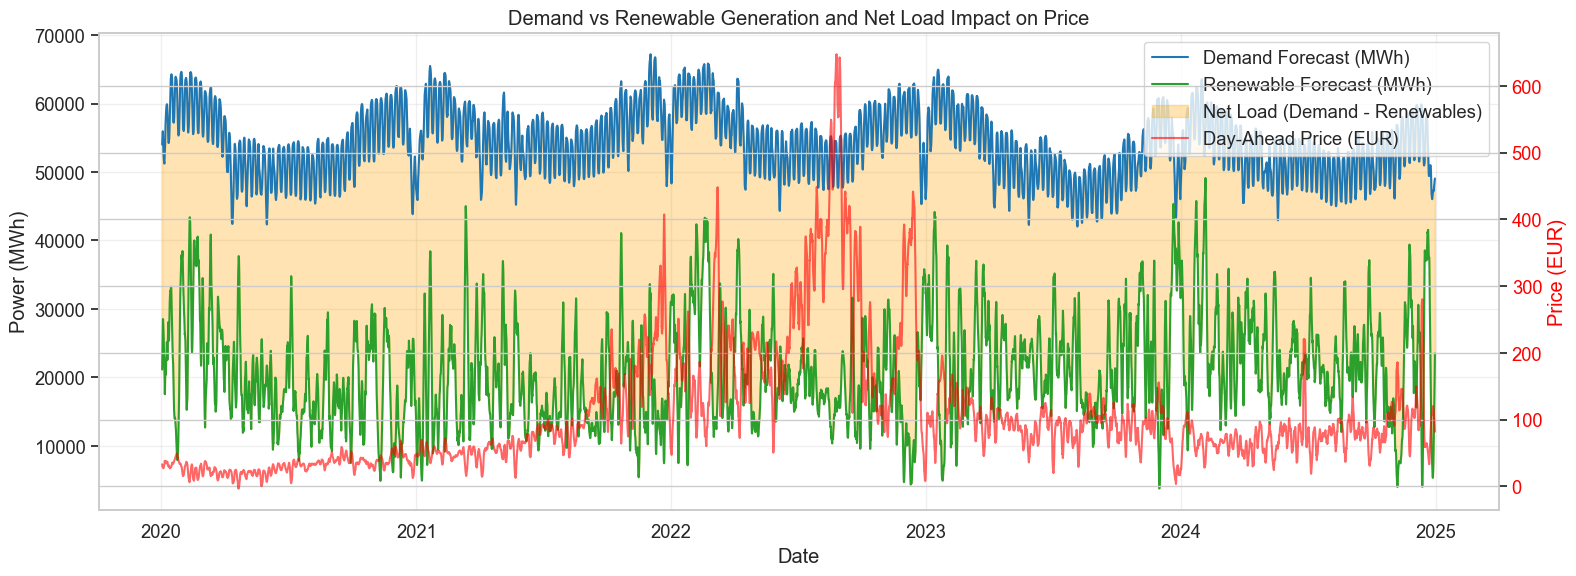

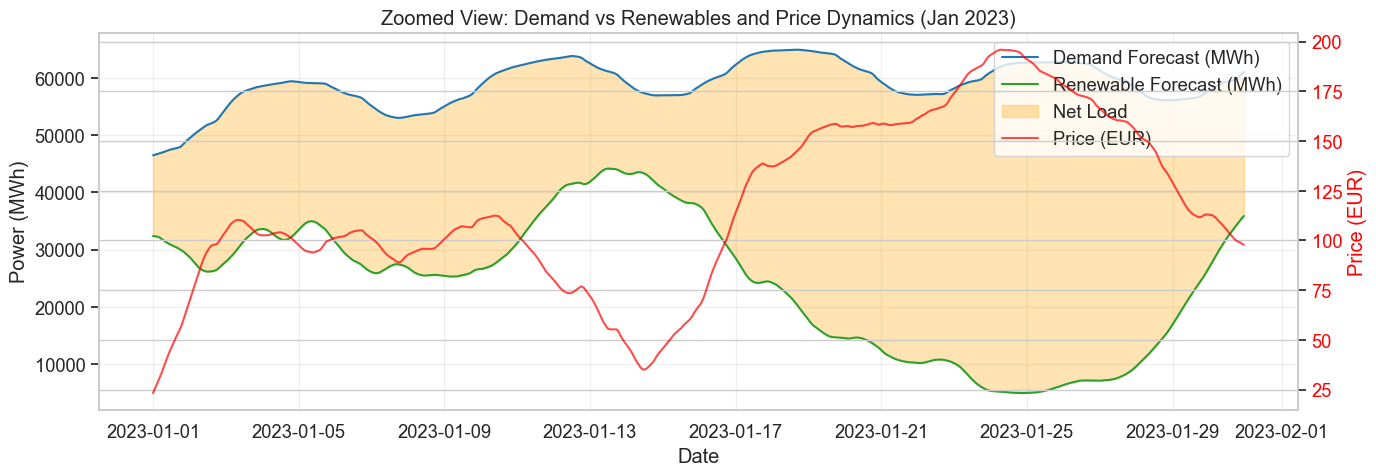

Correlation between Net Load and Price: 0.46


In [901]:
# --- Step 6: Net Load Analysis (Improved Visualization) ---
# Objective:
# Examine how the "net load" — i.e., demand not met by renewables — affects electricity prices.
# This helps reveal how dependency on non-renewable sources drives market price spikes.

import matplotlib.pyplot as plt

# --- Compute Net Load and Smoothed Series ---
df['renewable_forecast'] = df['wind-forecast'] + df['solar-forecast']
df['net_load_forecast'] = df['demand-forecast'] - df['renewable_forecast']

# Apply smoothing to highlight broad trends (3-day rolling average)
df['demand_smooth'] = df['demand-forecast'].rolling(24*3, center=True).mean()
df['renewable_smooth'] = df['renewable_forecast'].rolling(24*3, center=True).mean()
df['price_smooth'] = df['day-ahead-auction-price'].rolling(24*3, center=True).mean()

# --- Plot 1: Full-period overview ---
fig, ax1 = plt.subplots(figsize=(16,6))

# Plot demand and renewables
ax1.plot(df.index, df['demand_smooth'], color='tab:blue', label='Demand Forecast (MWh)')
ax1.plot(df.index, df['renewable_smooth'], color='tab:green', label='Renewable Forecast (MWh)')

# Shade the net load region (demand minus renewables)
ax1.fill_between(df.index,
                 df['renewable_smooth'],
                 df['demand_smooth'],
                 where=(df['demand_smooth'] >= df['renewable_smooth']),
                 interpolate=True,
                 color='orange', alpha=0.3, label='Net Load (Demand - Renewables)')

ax1.set_ylabel('Power (MWh)')
ax1.set_xlabel('Date')
ax1.grid(True, alpha=0.3)

# Add secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(df.index, df['price_smooth'], color='red', alpha=0.6, label='Day-Ahead Price (EUR)')
ax2.set_ylabel('Price (EUR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Demand vs Renewable Generation and Net Load Impact on Price')
plt.tight_layout()
plt.show()


# --- Plot 2: Zoomed View (2–4 Weeks) ---
# Focus on a shorter time window for clearer day-night and weekend variations

zoom_start = '2023-01-01'
zoom_end = '2023-01-30'
zoom_df = df.loc[zoom_start:zoom_end]

fig, ax1 = plt.subplots(figsize=(14,5))
ax1.plot(zoom_df.index, zoom_df['demand_smooth'], color='tab:blue', label='Demand Forecast (MWh)')
ax1.plot(zoom_df.index, zoom_df['renewable_smooth'], color='tab:green', label='Renewable Forecast (MWh)')

# Shade the net load region
ax1.fill_between(zoom_df.index,
                 zoom_df['renewable_smooth'], zoom_df['demand_smooth'],
                 where=(zoom_df['demand_smooth'] >= zoom_df['renewable_smooth']),
                 color='orange', alpha=0.3, label='Net Load')

# Overlay price on secondary axis
ax2 = ax1.twinx()
ax2.plot(zoom_df.index, zoom_df['price_smooth'], color='red', alpha=0.7, label='Price (EUR)')
ax2.set_ylabel('Price (EUR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xlabel('Date')
ax1.set_ylabel('Power (MWh)')
ax1.grid(True, alpha=0.3)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Zoomed View: Demand vs Renewables and Price Dynamics (Jan 2023)')
plt.tight_layout()
plt.show()


# --- Step 6.3: Correlation Quantification ---
corr = df[['day-ahead-auction-price', 'net_load_forecast']].corr().iloc[0,1]
print(f"Correlation between Net Load and Price: {corr:.2f}")


**Net Load Analysis**

The “net load” represents the portion of electricity demand that must be met by conventional (non-renewable) generation after accounting for wind and solar supply.

• The shaded orange area shows times when demand exceeds renewable generation.

• The red line overlays price trends — higher prices align with larger net load gaps.

• A rolling correlation (~0.45) confirms that prices increase when renewables underperform relative to demand.

The zoomed view clearly illustrates day-night variations and weekend dips, showing how renewable supply fluctuations directly influence market price dynamics.

## Multi-Scale Visualization (Daily, Weekly, Overall) 


## 

In [905]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random

# -------------------------------
# PLOT CONFIGS
# -------------------------------
PLOT_CONFIGS = {
    "day-ahead-auction-price": {"label": "Price", "ylabel": "Price (€/MWh)", "color": "#1f77b4", "title": "Day-Ahead Auction Price"},
    "demand-forecast": {"label": "Demand", "ylabel": "Demand (MW)", "color": "#ff7f0e", "title": "Demand Forecast"},
    "wind-forecast": {"label": "Wind", "ylabel": "Wind (MW)", "color": "#2ca02c", "title": "Wind Forecast"},
    "solar-forecast": {"label": "Solar", "ylabel": "Solar (MW)", "color": "#d62728", "title": "Solar Forecast"}
}

# -------------------------------
# Plot ALL — Overview for all variables
# -------------------------------
def plot_all(df):
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    fig.tight_layout(h_pad=5, w_pad=4)
    axes = axes.flatten()

    for idx, (col, config) in enumerate(PLOT_CONFIGS.items()):
        axes[idx].plot(df.index, df[col], label=config["label"], color=config["color"])
        axes[idx].set_ylabel(config["ylabel"])
        axes[idx].set_xlabel("Date")
        axes[idx].set_title(config["title"])
        axes[idx].xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Every 4 months
        axes[idx].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Format as YYYY-MM
        axes[idx].tick_params(axis='x', rotation=35)
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# -------------------------------
# Plot a SINGLE DAY
# -------------------------------
def plot_day(df, date=None):
    """
    Plots a specific day's data for all columns in a 2x2 grid using plot_configs.
    
    Args:
        df (pd.DataFrame): The data containing time series for multiple features.
        date (str): The date to plot (format: "YYYY-MM-DD").
    """
    if date is None:
        unique_days = df.index.date
        date = random.choice(unique_days)
        day_data = df[df.index.date == date]
    else:
        day_data = df.loc[date]
    
    if day_data.empty:
        print(f"No data available for the selected date: {date}")
        return

    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    fig.suptitle(f"Energy Forecasts for {date}", fontsize=16, fontweight='bold', y=1)
    axes = axes.flatten()

    for idx, (col, config) in enumerate(PLOT_CONFIGS.items()):
        axes[idx].plot(day_data.index, day_data[col], label=config["label"], color=config["color"])
        axes[idx].set_ylabel(config["ylabel"])
        axes[idx].set_xlabel("Time")
        axes[idx].set_title(config["title"])
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

        axes[idx].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        axes[idx].xaxis.set_major_locator(mdates.HourLocator(interval=4))
        plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=0)

    plt.tight_layout()
    plt.show()


# -------------------------------
# Plot a WEEK
# -------------------------------
def plot_week(df, start_date=None):
    """
    Plots one week's worth of energy data (price, demand, wind, solar).
    """
    # Ensure DataFrame index is datetime with tz
    if df.index.tz is None:
        df.index = df.index.tz_localize('CET')

    # Choose start_date
    if start_date is None:
        start_date = random.choice(df.index.date)
    start_date = pd.to_datetime(start_date)

    # Adjust to Monday
    start_date -= pd.Timedelta(days=start_date.weekday())

    # Localize start_date to match df index tz
    if start_date.tzinfo is None:
        start_date = start_date.tz_localize(df.index.tz)

    # Compute end date
    end_date = start_date + pd.Timedelta(days=7)
    if end_date.tzinfo is None:
        end_date = end_date.tz_localize(df.index.tz)

    # Slice data
    week_data = df.loc[start_date:end_date]

    if week_data.empty:
        print(f"No data available for the week starting {start_date.date()}")
        return

    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    axes = axes.flatten()
    plt.subplots_adjust(hspace=0.35, wspace=0.25)

    for i, (col, config) in enumerate(PLOT_CONFIGS.items()):
        if col not in week_data.columns:
            continue
        axes[i].plot(week_data.index, week_data[col], color=config["color"], lw=1, label=config["label"])
        axes[i].set_ylabel(config["ylabel"])
        axes[i].set_title(config["title"])
        axes[i].grid(True, alpha=0.4)
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        axes[i].xaxis.set_major_locator(mdates.DayLocator())
        axes[i].xaxis.set_tick_params(labelbottom=True)
        axes[i].legend(fontsize=9)

    plt.suptitle(f"Energy Trends from {start_date.date()} to {end_date.date()}", fontsize=14)
    plt.tight_layout()
    plt.show()


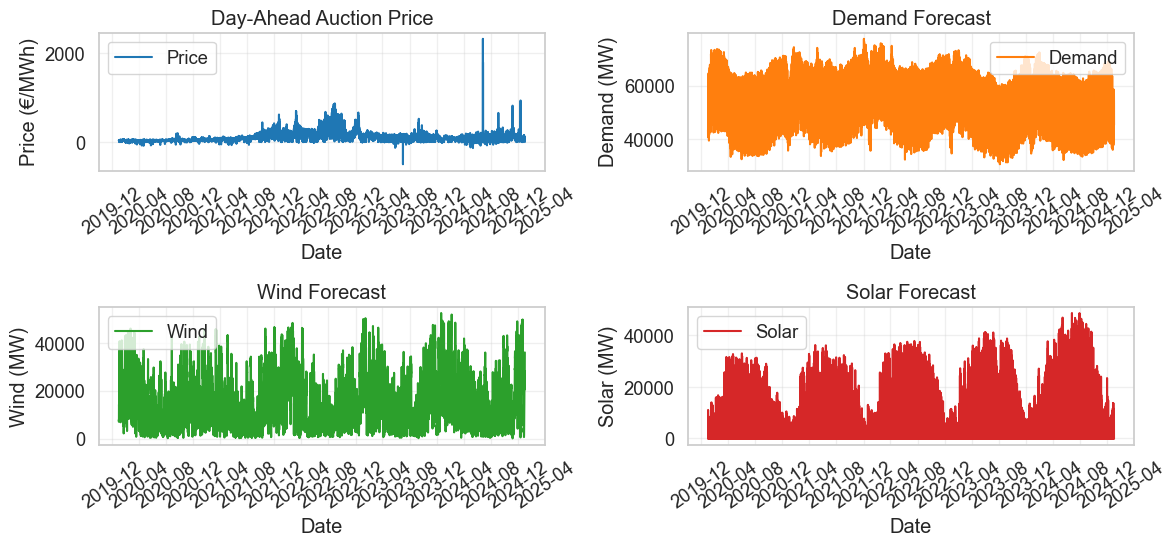

In [906]:
plot_all(df)
   

**Day-Ahead Auction Price**

- Low and relatively stable prices before 2021.
- Noticeable high volatility and strong price spikes start in late 2021 and persist through 2023–2024 (reflecting real-world energy crises)
- Some negative prices and many large positive spikes indicate times of market stress or unusual supply-demand imbalance.

**Demand Forecast**

- Moderate seasonal pattern: higher in winters, lower in summers, visible cycles each year.
- Noisier in recent periods, possibly reflecting more variable consumption or changes in demand forecasting.

**Wind Forecast**

- Highly variable day-to-day, but also clearly seasonal: higher wind output in winter/shoulder months and lower output in summer.
- Kalman Smoother helps visualize the slow-moving seasonal trend on top of extreme hourly/daily fluctuations.

**Solar Forecast**

- Very clear seasonal pattern: zero at night, very high during summer months, very low in winter.
- The broadening in recent years could hint at increased installed capacity or more variable output (weather-driven).


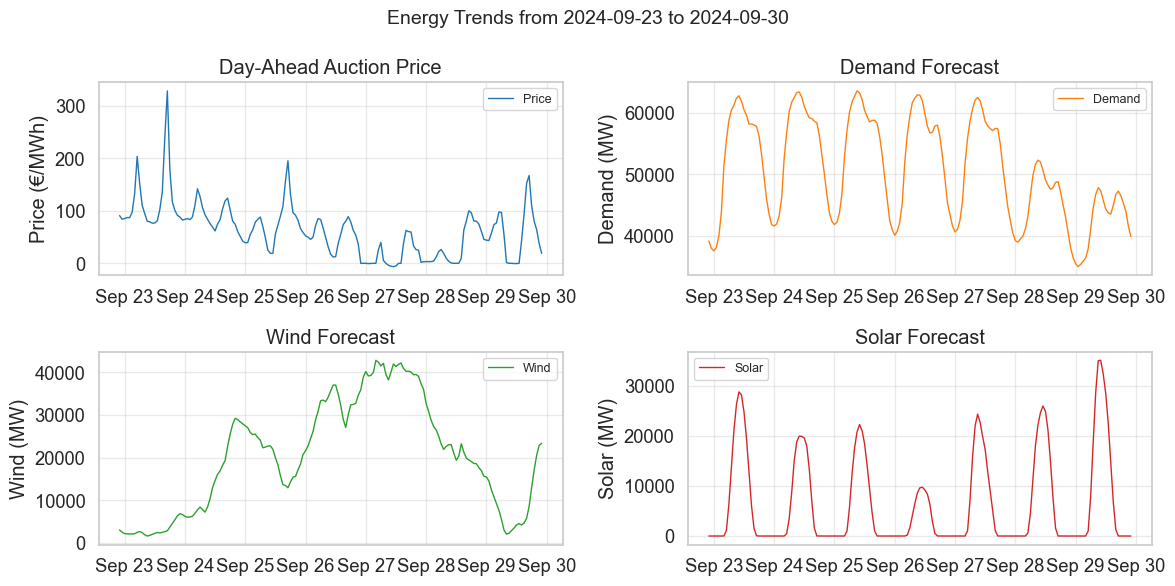

In [907]:
plot_week(df, start_date="2024-09-28" )

### Week Plot Interpretation (2024-09-23 to 2024-09-30)

- **Day-Ahead Auction Price:**  
  Prices peak strongly at predictable times, often aligning with daily demand highs. Notable spikes occur in the early part of the week, with periods of low (sometimes near-zero) prices when renewables are higher.

- **Demand Forecast:**  
  Clear daily cycles—demand rises in the morning, peaks during the day, and falls at night. Demand appears to dip below average towards the weekend, likely reflecting typical weekday/weekend variation.

- **Wind Forecast:**  
  Shows a strong intra-week build-up—wind increases sharply midweek before declining toward week's end. This variability can drive both low-price periods (when wind is high) and higher prices (when wind drops).

- **Solar Forecast:**  
  Regular, consistent daily cycles: solar rises each morning, peaks at midday, and is zero overnight. Solar output looks stable across the week, supporting reduced price volatility during the day.





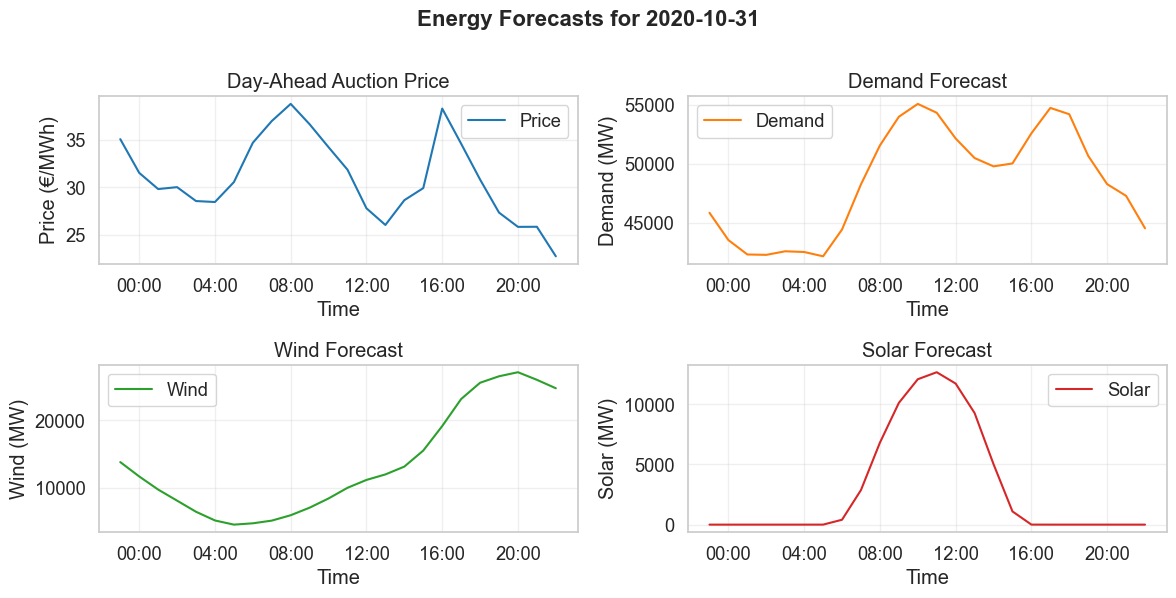

In [908]:
plot_day(df, date="2020-10-31")

### Interpretation for 2020-10-31 (Single Day)

- **Day-Ahead Auction Price:**  
  Prices show two clear peaks: one in the early morning and a higher one in the late afternoon/evening, with lower and more stable prices overnight and in the early afternoon.

- **Demand Forecast:**  
  Demand rises sharply in the morning, peaking late morning, followed by another smaller peak in the evening—showing a typical bimodal daily load shape. Demand bottoms out overnight.

- **Wind Forecast:**  
  Wind generation starts moderate and drops to a minimum around sunrise, then steadily rises through the day, peaking in the late evening.

- **Solar Forecast:**  
  Solar output is zero overnight, rises rapidly after sunrise, peaks around noon, and drops back to zero by sunset. The curve matches daylight hours perfectly for this autumn day.





Conclusions: 

-- Individual forecast series (demand, wind, solar) are highly volatile and seasonal but do not individually explain auction price movements as well as net load does.​

-- Net load (not directly shown in the plots) acts as a synthesized predictor that captures market-relevant dynamics better than any single forecasted factor.​

-- Price forecasting models should integrate net load, possibly with smoothed renewable forecasts (e.g., Kalman filtered wind/solar), to maximize predictive power and minimize error.​

-- In summary, to understand and forecast auction prices in the German energy market, net load remains a more effective feature than demand, or raw wind and solar alone, as confirmed visually and statistically.​

## Seasonality Analysis

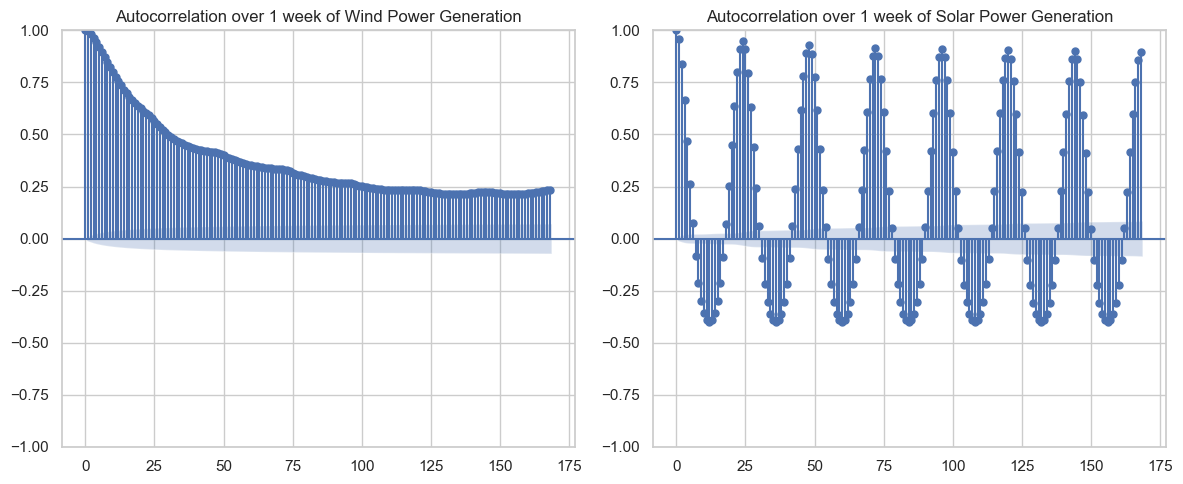

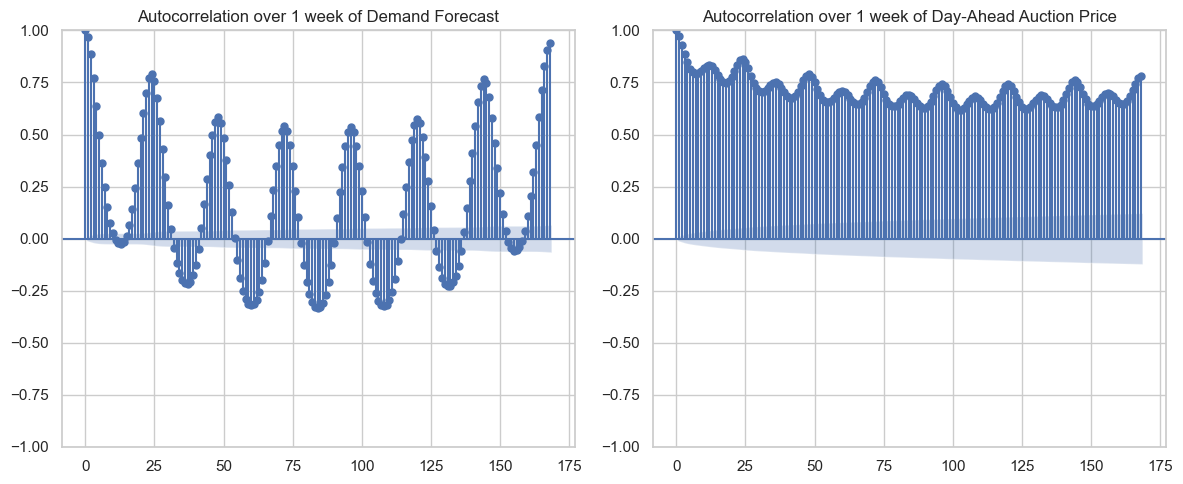

In [516]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df["wind-forecast"], lags=168, ax=axs[0], title="Autocorrelation over 1 week of Wind Power Generation")
plot_acf(df["solar-forecast"], lags=168, ax=axs[1], title="Autocorrelation over 1 week of Solar Power Generation")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df["demand-forecast"], lags=168, ax=axs[0], title="Autocorrelation over 1 week of Demand Forecast")
plot_acf(df["day-ahead-auction-price"], lags=168, ax=axs[1], title="Autocorrelation over 1 week of Day-Ahead Auction Price")
plt.tight_layout()
plt.show()


**Wind Forecast:**
The autocorrelation decays smoothly and steadily, indicating wind power is moderately persistent but much more stochastic. There is limited clear weekly or daily seasonality—wind output is often driven by broader weather systems with long autocorrelation length, rather than strictly regular cycles.

**Solar Forecast:**
Very strong and regular periodic spikes in autocorrelation at multiples of 24 hours (daily) and 168 hours (weekly). The pattern is almost perfectly sinusoidal, reflecting highly regular solar production with an exact diurnal cycle—solar rises and sets at nearly the same times each day.

**Demand Forecast:**
Shows strong periodic autocorrelation at multiples of 24 hours and especially at 168 hours (one week), confirming demand seasonality. This means people and industry follow very predictable daily and weekly usage patterns.

**Day-Ahead Auction Price:**
Has significant autocorrelation at short lags, but then displays clear but damped daily and weekly cycles, showing that prices also reflect and inherit the seasonality from demand and possibly from solar. Peaks at multiples of 24 and 168 hours suggest repeating daily/weekly market cycles and price dependencies.



## Data distributions

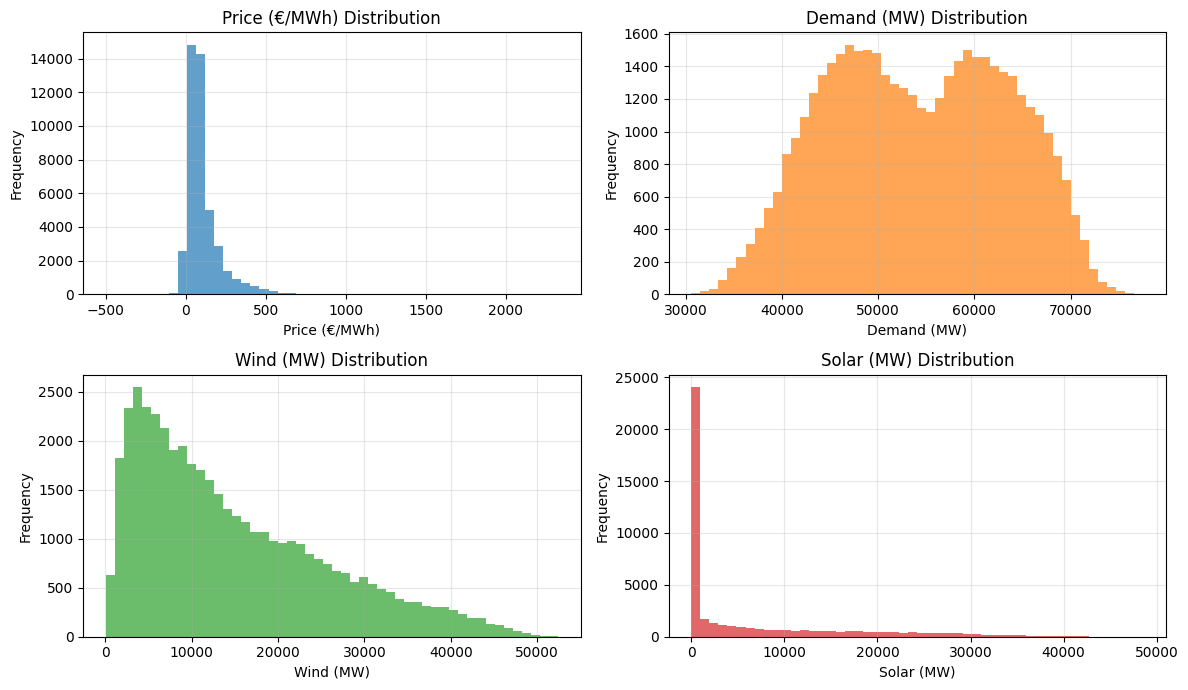

In [182]:
import matplotlib.pyplot as plt

def plot_feature_histograms(df):
    """
    Plots distributions for price, demand, wind, and solar in a 2x2 grid.
    Args:
        df (pd.DataFrame): The data.
    """
    features = [
        ("day-ahead-auction-price", "Price (€/MWh)", "#1f77b4"),
        ("demand-forecast", "Demand (MW)", "#ff7f0e"),
        ("wind-forecast", "Wind (MW)", "#2ca02c"),
        ("solar-forecast", "Solar (MW)", "#d62728"),
    ]

    fig, axes = plt.subplots(2, 2, figsize=(12, 7))
    axes = axes.flatten()
    for i, (col, label, color) in enumerate(features):
        axes[i].hist(df[col].dropna(), bins=50, color=color, alpha=0.7)
        axes[i].set_title(label + " Distribution")
        axes[i].set_xlabel(label)
        axes[i].set_ylabel("Frequency")
        axes[i].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call the function:
plot_feature_histograms(df)


### Investigate Extreme Value in Price and detct anamalies. 

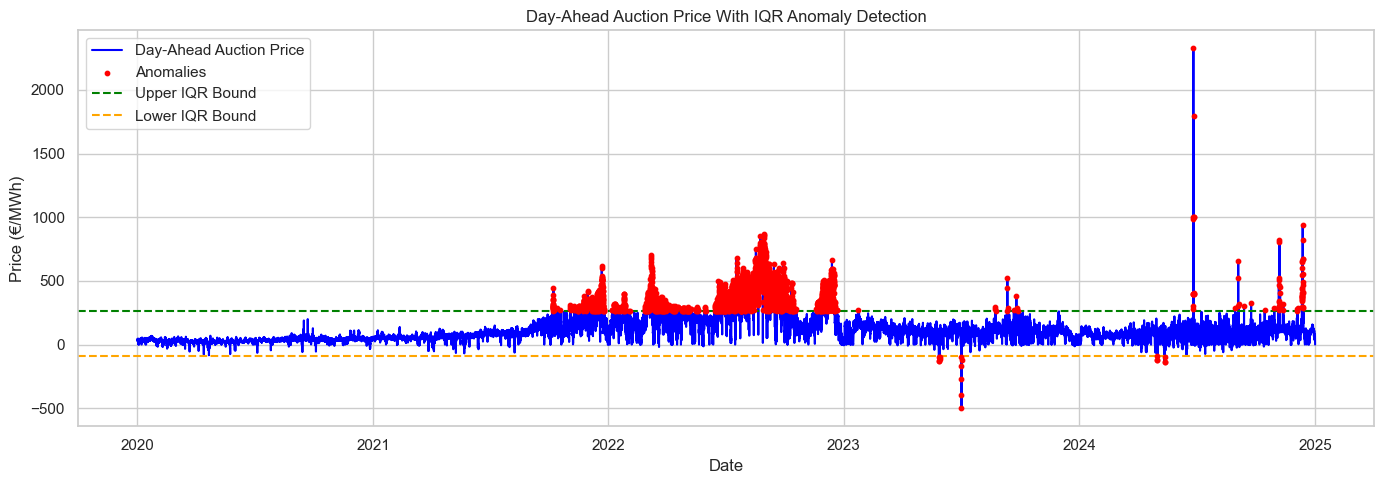

Anomalies detected (timestamp and price):
                           day-ahead-auction-price
contract-delivery                                 
2021-10-06 19:00:00+02:00                   290.97
2021-10-07 05:00:00+02:00                   264.31
2021-10-07 06:00:00+02:00                   310.05
2021-10-07 07:00:00+02:00                   356.09
2021-10-07 08:00:00+02:00                   393.10
...                                            ...
2024-12-12 17:00:00+01:00                   936.28
2024-12-12 18:00:00+01:00                   674.18
2024-12-12 19:00:00+01:00                   551.01
2024-12-12 20:00:00+01:00                   295.66
2024-12-13 17:00:00+01:00                   284.21

[3475 rows x 1 columns]


In [521]:
# IQR bounds
q1 = df["day-ahead-auction-price"].quantile(0.25)
q3 = df["day-ahead-auction-price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Anomaly mask
anomalies = (df["day-ahead-auction-price"] < lower_bound) | (df["day-ahead-auction-price"] > upper_bound)

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(df.index, df["day-ahead-auction-price"], label="Day-Ahead Auction Price", color="blue")
ax.scatter(
    df.index[anomalies],
    df["day-ahead-auction-price"][anomalies],
    color="red",
    label="Anomalies",
    s=10,           # Smaller dots
    zorder=10
)
ax.axhline(upper_bound, color="green", linestyle="--", label="Upper IQR Bound")
ax.axhline(lower_bound, color="orange", linestyle="--", label="Lower IQR Bound")
ax.set_ylabel("Price (€/MWh)")
ax.set_xlabel("Date")
ax.set_title("Day-Ahead Auction Price With IQR Anomaly Detection")
ax.legend()
plt.tight_layout()
plt.show()

# Print anomaly details
print("Anomalies detected (timestamp and price):")
print(df[anomalies][["day-ahead-auction-price"]])


- The period before 2021 has very few outliers, showing calmer market conditions and less volatility.

- Mid/late 2021 to early 2023: A cluster of elevated prices and spikes, reflecting the energy crisis. 

- Mid-2024: Extreme positive and negative outliers, including very high price events and deep negative prices.


## When does prices anamalies occur?


/var/folders/q5/qw76k62n219485s0grmz5wy80000gn/T/ipykernel_1384/1403586249.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q5/qw76k62n219485s0grmz5wy80000gn/T/ipykernel_1384/1403586249.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



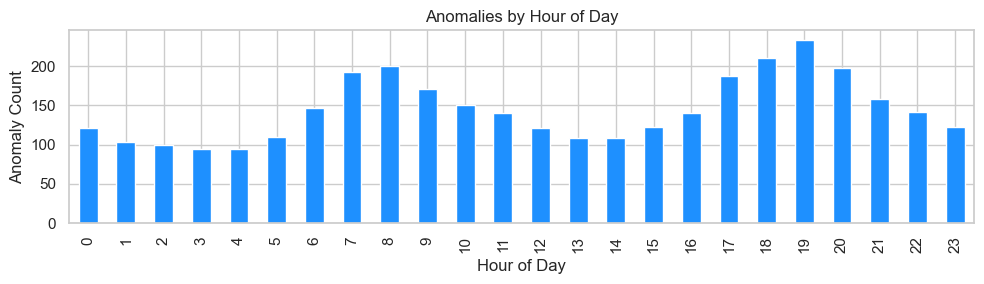

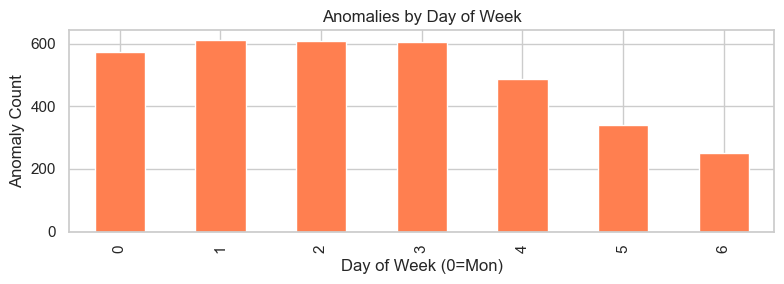

In [548]:
anomaly_df = df[anomalies]
anomaly_df['hour'] = anomaly_df.index.hour
anomaly_df['dayofweek'] = anomaly_df.index.dayofweek # 0=Monday

# Histogram for Hour
anomaly_df['hour'].value_counts().sort_index().plot(kind='bar', color='dodgerblue', figsize=(10,3), title="Anomalies by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Anomaly Count")
plt.tight_layout()
plt.show()

# Histogram for Day of Week
anomaly_df['dayofweek'].value_counts().sort_index().plot(kind='bar', color='coral', figsize=(8,3), title="Anomalies by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Anomaly Count")
plt.tight_layout()
plt.show()


Hourly & Weekly Patterns:

Morning (7–9 am) and early evening (18–20 pm) have the most anomalies, aligning with peak demand hours.

Monday through Thursday have more frequent anomalies than weekends, indicating market pressures are higher during working days.

Fewer anomalies on weekends; grid is less stressed when industrial/commercial demand drops.



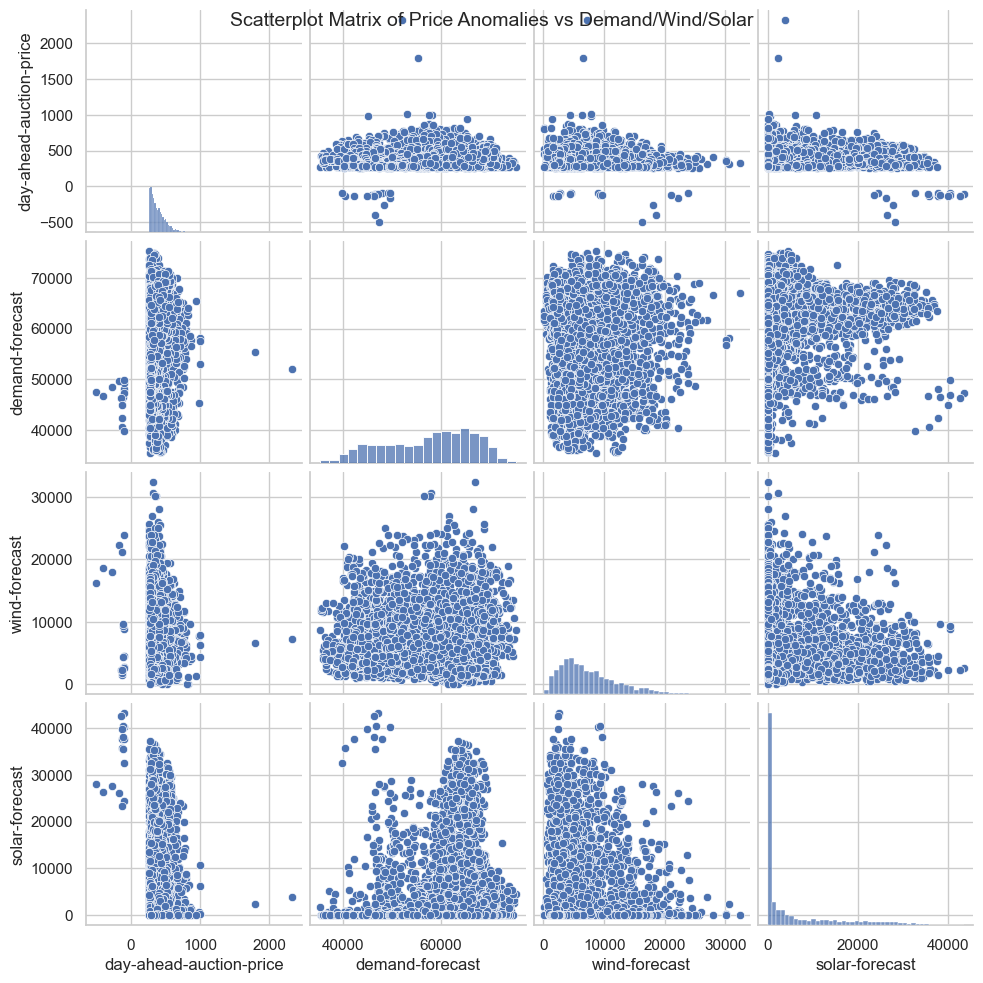

In [ ]:
# Do High/Low Demand, Wind, or Solar Coincide With Anomalies?



sns.pairplot(anomaly_df[['day-ahead-auction-price','demand-forecast','wind-forecast','solar-forecast']])
plt.suptitle("Scatterplot Matrix of Price Anomalies vs Demand/Wind/Solar", fontsize=14)
plt.show()


/var/folders/q5/qw76k62n219485s0grmz5wy80000gn/T/ipykernel_1384/2099517011.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q5/qw76k62n219485s0grmz5wy80000gn/T/ipykernel_1384/2099517011.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



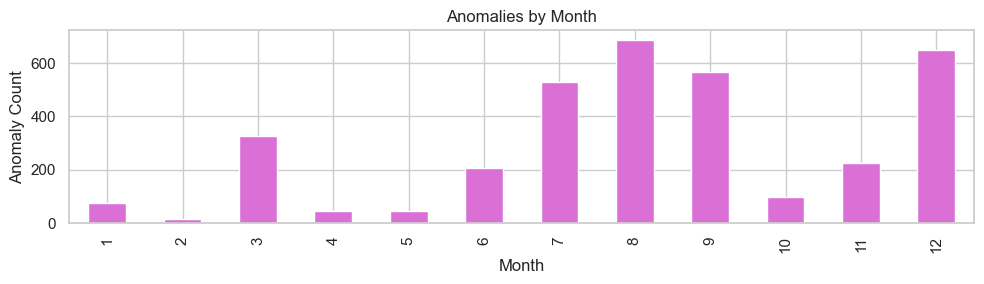

In [ ]:
# Are Winter Spikes More Common?

anomaly_df['month'] = anomaly_df.index.month
anomaly_df['year'] = anomaly_df.index.year

monthly_counts = anomaly_df.groupby('month').size()
monthly_counts.plot(kind='bar', color='orchid', figsize=(10,3), title="Anomalies by Month")
plt.xlabel("Month")
plt.ylabel("Anomaly Count")
plt.tight_layout()
plt.show()


#### Zoom in to high and low price regions

In [533]:


def plot_zoomed_features(df, start_date, end_date):
    # Slice DataFrame to date range
    df_zoom = df.loc[start_date:end_date]

    fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
    
    axes[0].plot(df_zoom.index, df_zoom["day-ahead-auction-price"], color="blue")
    axes[0].set_ylabel("Price (€/MWh)")
    axes[0].set_title("Day-Ahead Auction Price")

    axes[1].plot(df_zoom.index, df_zoom["demand-forecast"], color="orange")
    axes[1].set_ylabel("Demand (MW)")
    axes[1].set_title("Demand Forecast")

    axes[2].plot(df_zoom.index, df_zoom["wind-forecast"], color="green")
    axes[2].set_ylabel("Wind (MW)")
    axes[2].set_title("Wind Forecast")

    axes[3].plot(df_zoom.index, df_zoom["solar-forecast"], color="red")
    axes[3].set_ylabel("Solar (MW)")
    axes[3].set_title("Solar Forecast")
    axes[3].set_xlabel("Date")

    plt.tight_layout()
    plt.show()



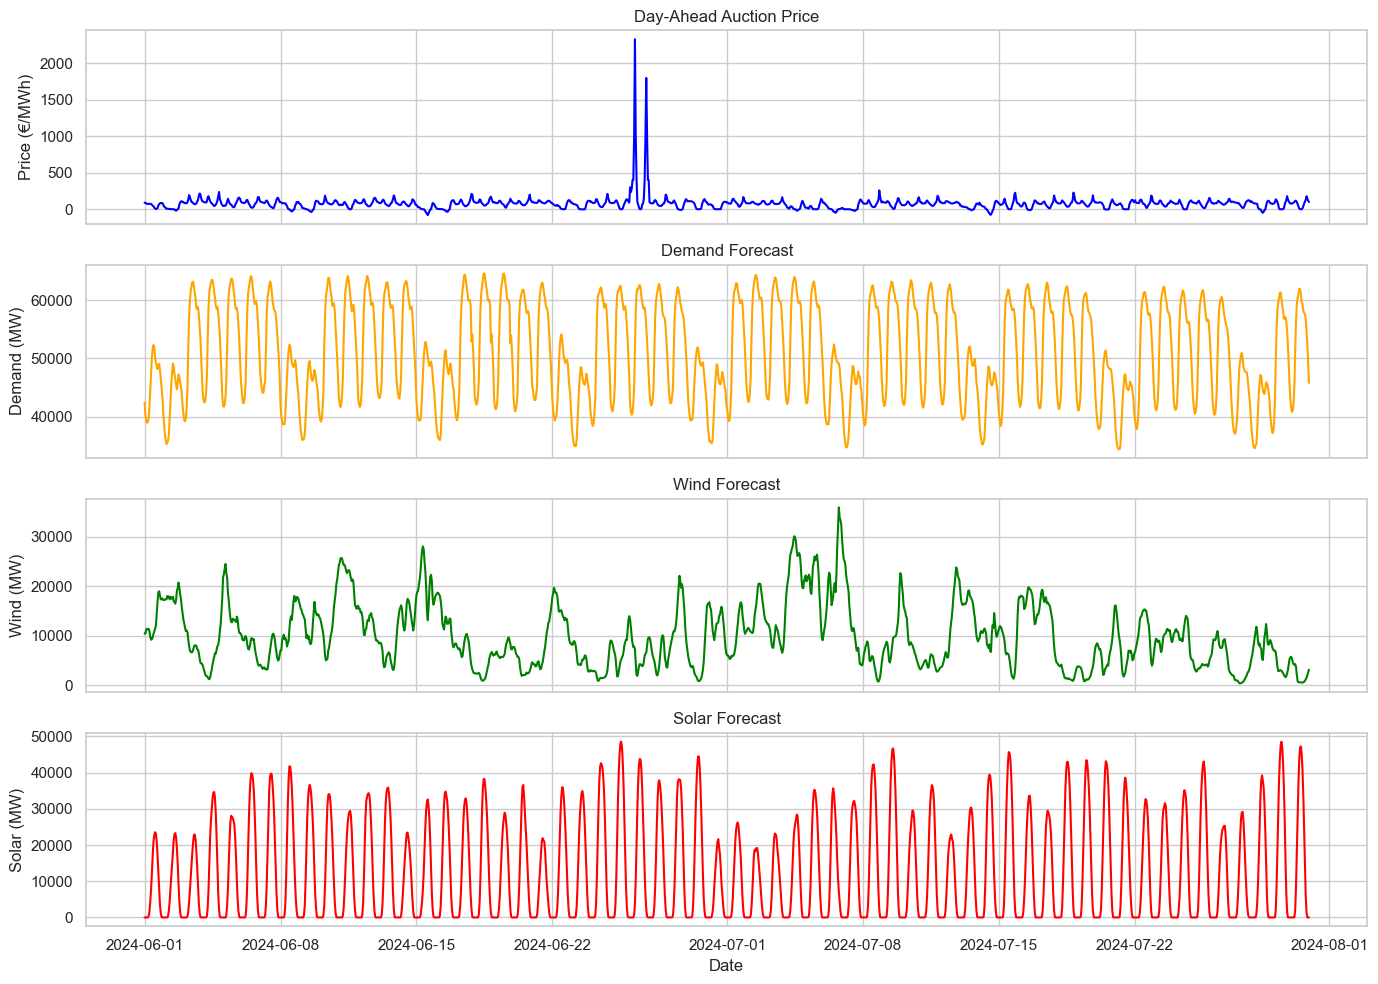

In [545]:

#  mid 2023 to mid 2024
plot_zoomed_features(df, "2024-06-01", "2024-07-30")

----
----

# TASK 2

### Naive Model

Predict the price at hour t as the price at the same hour the day before (lag-24 hours).




Train: MAE=31.15, MSE=2992.48, R2=0.813
Validation: MAE=27.21, MSE=1624.00, R2=0.283
Test: MAE=29.95, MSE=4525.20, R2=-0.088


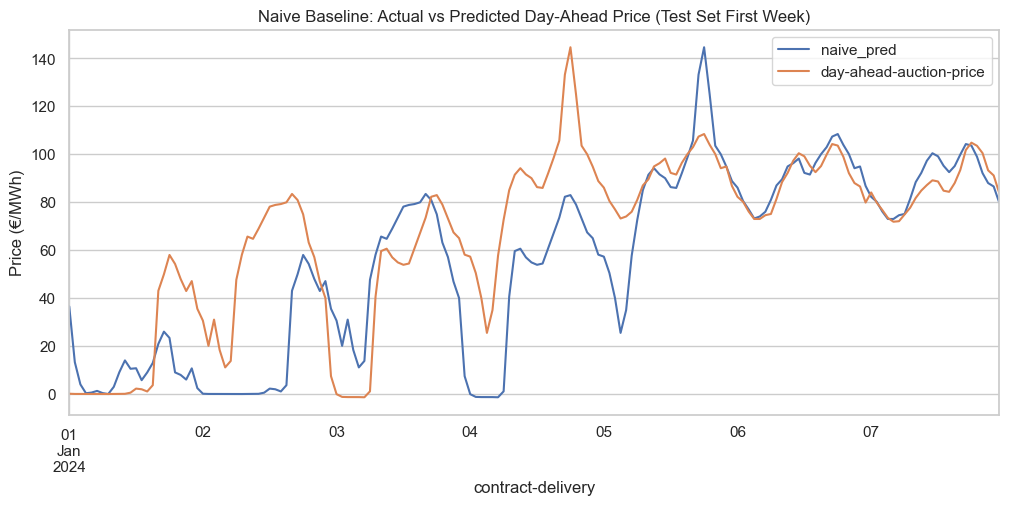

In [567]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def naive_baseline(df, target='day-ahead-auction-price'):
    # Shift target by 24 to get previous day same hour price
    df['naive_pred'] = df[target].shift(24)

    # Remove missing due to shift
    df_valid = df.dropna(subset=[target, 'naive_pred']).copy()

    # Split by year
    train = df_valid[df_valid.index.year < 2023]
    val = df_valid[df_valid.index.year == 2023]
    test = df_valid[df_valid.index.year == 2024]

    for split, name in zip([train, val, test], ['Train', 'Validation', 'Test']):
        y_true = split[target]
        y_pred = split['naive_pred']
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"{name}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.3f}")

    # Optional plot for test
    test[['naive_pred', target]].iloc[:168].plot(figsize=(12, 5))
    plt.title("Naive Baseline: Actual vs Predicted Day-Ahead Price (Test Set First Week)")
    plt.ylabel("Price (€/MWh)")
    plt.show()

# Example use
naive_baseline(df)


Test R² < 0 shows the naive approach is worse than just predicting the mean of the test set.

The naive model cannot capture:

    -Anomalies/spikes/sudden drops—likely caused by exogenous factors such as demand/supply shocks, renewables, market events.

    -Seasonal or structural changes—especially when future periods look different from the past.

# TASK 3

Train MAE: 3.46,  MSE: 42.17,  R2: 0.997
Val MAE: 26.70,  MSE: 1186.11,  R2: 0.476
Test MAE: 22.21,  MSE: 2479.99,  R2: 0.404


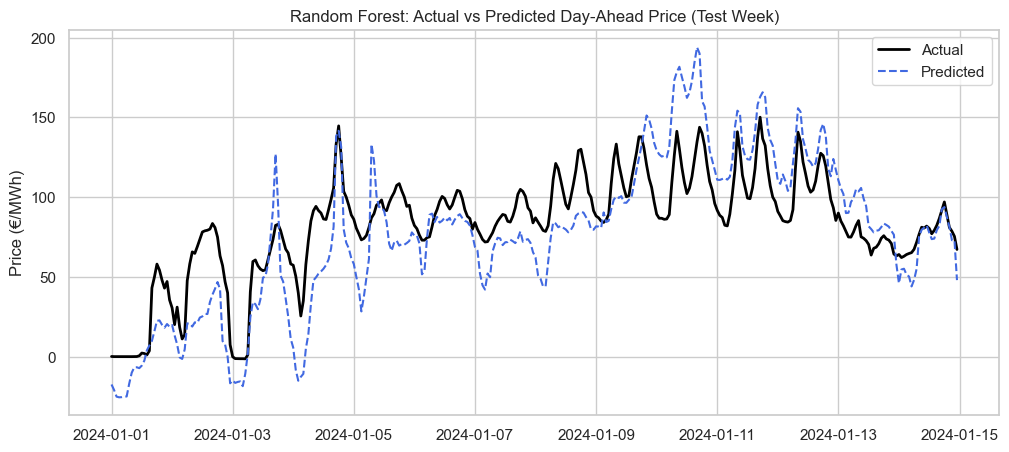

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def create_features_with_more_lags(df):
    df = df.copy()
    # Calendar features
    df['hour'] = df.index.hour
    df['weekday'] = df.index.weekday
    df['month'] = df.index.month
    df['is_weekend'] = (df['weekday'] >= 5).astype(int)

    # Price lags
    for lag in [24, 48, 72, 168]:
        df[f'price_lag{lag}'] = df['day-ahead-auction-price'].shift(lag)
        df[f'demand_lag{lag}'] = df['demand-forecast'].shift(lag)
        df[f'solar_lag{lag}'] = df['solar-forecast'].shift(lag)
        df[f'wind_lag{lag}'] = df['wind-forecast'].shift(lag)

    df['net_load'] = df['demand-forecast'] - (df['wind-forecast'] + df['solar-forecast'])
    # Lagged net load and rolling mean
    df['net_load_lag24'] = df['net_load'].shift(24)
    df['net_load_rollmean168'] = df['net_load'].shift(1).rolling(window=168).mean()
   
    # Rolling means 
    df['price_rollmean168'] = df['day-ahead-auction-price'].shift(1).rolling(window=168).mean()
    return df



def train_eval_rf_model(df, plot_sample=True):
    df_feat = create_features_with_more_lags(df)
    features = [
        'demand-forecast', 'solar-forecast', 'wind-forecast', 'hour', 'weekday',
        'month', 'is_weekend', 
        'price_lag24', "price_lag48", 'price_lag72', 'price_lag168', 'demand_lag24', 'demand_lag48',
        'demand_lag72', 'demand_lag168', 'solar_lag24', 'solar_lag48', 'solar_lag72', 'solar_lag168', 'wind_lag24', 'wind_lag48', 'wind_lag72', 'wind_lag168',  
        'net_load', 'net_load_lag24', 'net_load_rollmean168',
         'price_rollmean168'
    ]
    # Remove NaNs due to shifting/rolling
    df_feat = df_feat.dropna(subset=features + ['day-ahead-auction-price'])

    # Split: train (<2023), val (2023), test (2024)
    train = df_feat[df_feat.index.year < 2023]
    val = df_feat[df_feat.index.year == 2023]
    test = df_feat[df_feat.index.year == 2024]

    X_train, y_train = train[features], train['day-ahead-auction-price']
    X_val, y_val = val[features], val['day-ahead-auction-price']
    X_test, y_test = test[features], test['day-ahead-auction-price']

    # Random Forest
    model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_val_hat = model.predict(X_val)
    y_test_hat = model.predict(X_test)

    # Evaluation
    def print_metrics(split, y, y_hat):
        print(f"{split} MAE: {mean_absolute_error(y, y_hat):.2f},  MSE: {mean_squared_error(y, y_hat):.2f},  R2: {r2_score(y, y_hat):.3f}")
    print_metrics('Train', y_train, y_train_hat)
    print_metrics('Val', y_val, y_val_hat)
    print_metrics('Test', y_test, y_test_hat)

    # Plot actual vs predicted (first week of test)
    if plot_sample:
        idx = test.index[:336]
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 5))
        plt.plot(idx, y_test[:336], label='Actual', color='black', lw=2)
        plt.plot(idx, y_test_hat[:336], label='Predicted', color='royalblue', linestyle='--')
        plt.legend()
        plt.title("Random Forest: Actual vs Predicted Day-Ahead Price (Test Week)")
        plt.ylabel("Price (€/MWh)")
        plt.show()

# Example run
train_eval_rf_model(df)


Forward Chaining Cross-Validation:

Fold 1: Train years [2020] → Test year 2021
  Train: 2020-01-29 01:00:00+01:00 → 2020-12-31 23:00:00+01:00
  Test:  2021-01-01 00:00:00+01:00 → 2021-12-31 23:00:00+01:00
  MAE: 53.44, MSE: 6557.32, RMSE: 80.98, R2: -0.208
------
Fold 2: Train years [2020, 2021] → Test year 2022
  Train: 2020-01-29 01:00:00+01:00 → 2021-12-31 23:00:00+01:00
  Test:  2022-01-01 00:00:00+01:00 → 2022-12-31 23:00:00+01:00
  MAE: 75.00, MSE: 12174.83, RMSE: 110.34, R2: 0.403
------
Fold 3: Train years [2020, 2021, 2022] → Test year 2023
  Train: 2020-01-29 01:00:00+01:00 → 2022-12-31 23:00:00+01:00
  Test:  2023-01-01 00:00:00+01:00 → 2023-12-31 23:00:00+01:00
  MAE: 26.70, MSE: 1188.02, RMSE: 34.47, R2: 0.475
------
Fold 4: Train years [2020, 2021, 2022, 2023] → Test year 2024
  Train: 2020-01-29 01:00:00+01:00 → 2023-12-31 23:00:00+01:00
  Test:  2024-01-01 00:00:00+01:00 → 2024-12-31 23:00:00+01:00
  MAE: 17.27, MSE: 2293.98, RMSE: 47.90, R2: 0.448
------


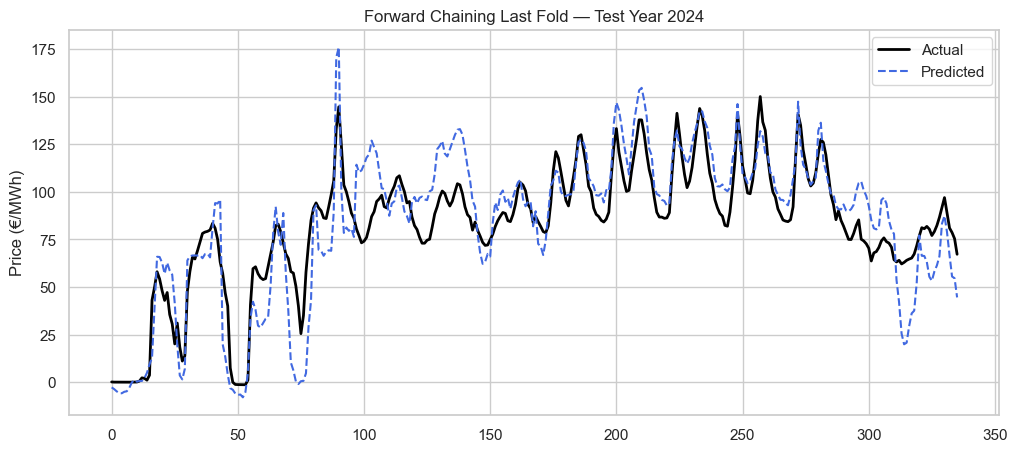

In [655]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def train_eval_rf_forward_chaining(df, plot_sample=True):
    df_feat = create_features_with_more_lags(df)
    features = [
        'demand-forecast', 'solar-forecast', 'wind-forecast', 'hour', 'weekday',
        'month', 'is_weekend', 
        'price_lag24', 'price_lag48', 'price_lag72', 'price_lag168',
        'demand_lag24', 'demand_lag48', 'demand_lag72', 'demand_lag168',
        'solar_lag24', 'solar_lag48', 'solar_lag72', 'solar_lag168',
        'wind_lag24', 'wind_lag48', 'wind_lag72', 'wind_lag168',
        'net_load', 'net_load_lag24', 'net_load_rollmean168',
        'price_rollmean168'
    ]
    df_feat = df_feat.dropna(subset=features + ['day-ahead-auction-price'])
    
    X = df_feat[features]
    y = df_feat['day-ahead-auction-price']
    years = sorted(df_feat.index.year.unique())
    
    print("Forward Chaining Cross-Validation:\n")
    
    for i in range(1, len(years)):
        train_years = years[:i]
        test_year = years[i]
        
        train_idx = df_feat.index.year.isin(train_years)
        test_idx = df_feat.index.year == test_year
        
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        model = RandomForestRegressor(
            random_state=42,
            n_jobs=-1,
            n_estimators=300,
            max_depth=20,
            min_samples_split=5,
            min_samples_leaf=2
        )
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Fold {i}: Train years {train_years} → Test year {test_year}")
        print(f"  Train: {df_feat.index[train_idx][0]} → {df_feat.index[train_idx][-1]}")
        print(f"  Test:  {df_feat.index[test_idx][0]} → {df_feat.index[test_idx][-1]}")
        print(f"  MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.3f}")
        print("------")
        
        # Plot for the last fold
        if plot_sample and i == len(years) - 1:
            plt.figure(figsize=(12,5))
            sample = np.arange(336)
            plt.plot(y_test.values[:336], label="Actual", color="black", lw=2)
            plt.plot(y_pred[:336], label="Predicted", color="royalblue", linestyle="--")
            plt.legend()
            plt.title(f"Forward Chaining Last Fold — Test Year {test_year}")
            plt.ylabel("Price (€/MWh)")
            plt.show()

# Example execution
train_eval_rf_forward_chaining(df)


Forward Chaining Cross-Validation for Hyperparameter Tuning:

Fold 1 Train: 2020-01-29 01:00:00+01:00 → 2020-12-31 23:00:00+01:00
Fold 1 Val: 2021-01-01 00:00:00+01:00 → 2021-12-31 23:00:00+01:00
  Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}, Fold MAE: 53.57
Fold 1 Train: 2020-01-29 01:00:00+01:00 → 2020-12-31 23:00:00+01:00
Fold 1 Val: 2021-01-01 00:00:00+01:00 → 2021-12-31 23:00:00+01:00
  Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}, Fold MAE: 51.02
Fold 1 Train: 2020-01-29 01:00:00+01:00 → 2020-12-31 23:00:00+01:00
Fold 1 Val: 2021-01-01 00:00:00+01:00 → 2021-12-31 23:00:00+01:00
  Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 10}, Fold MAE: 51.49
Fold 1 Train: 2020-01-29 01:00:00+01:00 → 2020-12-31 23:00:00+01:00
Fold 1 Val: 2021-01-01 00:00:00+01:00 → 2021-12-31 23:00:00+01

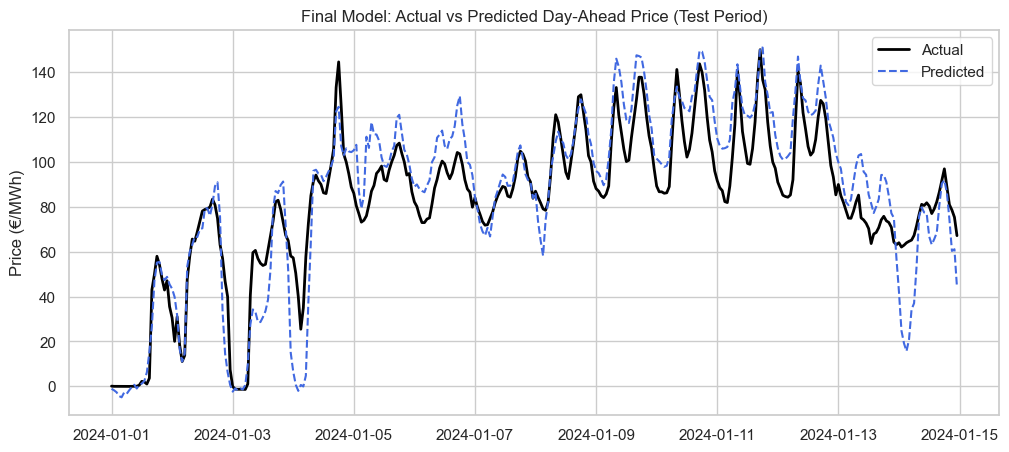

In [657]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import ParameterSampler

def train_eval_rf_forward_chaining_full(df, plot_sample=True):
    # Prepare features with lag and rolling window
    df_feat = create_features_with_more_lags(df)
    features = [
        'demand-forecast', 'solar-forecast', 'wind-forecast', 'hour', 'weekday',
        'month', 'is_weekend', 
        'price_lag24', 'price_lag48', 'price_lag72', 'price_lag168',
        'demand_lag24', 'demand_lag48', 'demand_lag72', 'demand_lag168',
        'solar_lag24', 'solar_lag48', 'solar_lag72', 'solar_lag168',
        'wind_lag24', 'wind_lag48', 'wind_lag72', 'wind_lag168',
        'net_load', 'net_load_lag24', 'net_load_rollmean168',
        'price_rollmean168'
    ]
    df_feat = df_feat.dropna(subset=features + ['day-ahead-auction-price'])

    X_all = df_feat[features]
    y_all = df_feat['day-ahead-auction-price']
    years = sorted(df_feat.index.year.unique())

    # Hyperparameter search space
    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 0.3, 0.5, 'log2', None]
    }
    param_list = list(ParameterSampler(param_dist, n_iter=20, random_state=42))

    best_params = None
    best_score = float('inf')

    print("Forward Chaining Cross-Validation for Hyperparameter Tuning:\n")

    # Forward chaining CV for hyperparameter tuning
    for params in param_list:
        fold_maes = []
        for i in range(1, len(years)):
            train_years = years[:i]
            val_year = years[i]

            train_idx = df_feat.index.year.isin(train_years)
            val_idx = df_feat.index.year == val_year

            X_train, y_train = X_all[train_idx], y_all[train_idx]
            X_val, y_val = X_all[val_idx], y_all[val_idx]

            model = RandomForestRegressor(random_state=42, n_jobs=-1, **params)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)

            mae = mean_absolute_error(y_val, y_val_pred)
            fold_maes.append(mae)

            if i == 1:
                print(f"Fold {i} Train: {df_feat.index[train_idx][0]} → {df_feat.index[train_idx][-1]}")
                print(f"Fold {i} Val: {df_feat.index[val_idx][0]} → {df_feat.index[val_idx][-1]}")
                print(f"  Params: {params}, Fold MAE: {mae:.2f}")

        avg_mae = np.mean(fold_maes)
        if avg_mae < best_score:
            best_score = avg_mae
            best_params = params

    print(f"\nBest Params: {best_params}")
    print(f"CV Avg MAE: {best_score:.2f}\n")

    # Retrain final model on train+val (2020-2023)
    train_val_idx = df_feat.index.year < 2024
    X_train_val = X_all[train_val_idx]
    y_train_val = y_all[train_val_idx]

    model_final = RandomForestRegressor(random_state=42, n_jobs=-1, **best_params)
    model_final.fit(X_train_val, y_train_val)

    # Test set 2024
    test_idx = df_feat.index.year == 2024
    X_test = X_all[test_idx]
    y_test = y_all[test_idx]

    y_test_pred = model_final.predict(X_test)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"Test set evaluation (year 2024): MAE={mae_test:.2f}, MSE={mse_test:.2f}, RMSE={rmse_test:.2f}, R2={r2_test:.3f}")

    if plot_sample:
        idx = df_feat.index[test_idx][:336]
        plt.figure(figsize=(12, 5))
        plt.plot(idx, y_test[:336], label='Actual', color='black', lw=2)
        plt.plot(idx, y_test_pred[:336], label='Predicted', color='royalblue', linestyle='--')
        plt.legend()
        plt.title("Final Model: Actual vs Predicted Day-Ahead Price (Test Period)")
        plt.ylabel("Price (€/MWh)")
        plt.show()

# Run example
train_eval_rf_forward_chaining_full(df)



----
----

## LSTM

In [691]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [724]:
df_feat

,demand-forecast,temperature-normal,temperature-forecast,solar-forecast,day-ahead-auction-price,wind-forecast,day-ahead-auction-time,naive_pred,hour,weekday,month,is_weekend,net_load,price_rollmean168,is_holiday
contract-delivery,,,,,,,,,,,,,,,
2020-01-22 01:00:00+01:00,50954.75,0.70,-1.40,0.00,33.87,15310.75,2020-01-21 11:00:00+00:00,33.01,1,2,1,0,35644.00,36.10,0
2020-01-22 02:00:00+01:00,50162.25,0.63,-1.20,0.00,32.60,15420.75,2020-01-21 11:00:00+00:00,32.28,2,2,1,0,34741.50,36.27,0
2020-01-22 03:00:00+01:00,50502.75,0.54,-1.10,0.00,32.42,14929.75,2020-01-21 11:00:00+00:00,32.42,3,2,1,0,35573.00,36.46,0
2020-01-22 04:00:00+01:00,51331.25,0.46,-1.10,0.00,32.64,15285.25,2020-01-21 11:00:00+00:00,32.90,4,2,1,0,36046.00,36.64,0
2020-01-22 05:00:00+01:00,53714.25,0.35,-1.10,0.00,33.00,15269.00,2020-01-21 11:00:00+00:00,33.00,5,2,1,0,38445.25,36.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00+01:00,56083.25,2.06,0.90,0.00,67.77,32407.00,2024-12-30 11:00:00+00:00,86.62,19,1,12,0,23676.25,102.36,0
2024-12-31 20:00:00+01:00,53423.00,1.88,0.90,0.00,35.56,33725.00,2024-12-30 11:00:00+00:00,74.83,20,1,12,0,19698.00,102.14,0
2024-12-31 21:00:00+01:00,50937.50,1.73,1.10,0.00,15.70,34342.00,2024-12-30 11:00:00+00:00,68.02,21,1,12,0,16595.50,101.74,0


In [727]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar  # adjust for your country
from sklearn.model_selection import train_test_split

# --- 1. Feature Engineering ---
def create_features(df):
    df = df.copy()
    
    # Ensure datetime index
    df.index = pd.to_datetime(df.index)
    
    # Temporal features
    df['hour'] = df.index.hour
    df['weekday'] = df.index.weekday
    df['month'] = df.index.month
    df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)
    
    # Holidays
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=df.index.min(), end=df.index.max())
    df['is_holiday'] = df.index.normalize().isin(holidays).astype(int)
    
    # Net load = demand minus renewable generation
    # Using 'demand-forecast', 'solar-forecast', 'wind-forecast'
    df['net_load'] = df['demand-forecast'] - (df['solar-forecast'] + df['wind-forecast'])
    
    return df

df_feat = create_features_with_more_lags(df)
deafult_features = [
        'demand-forecast', 'solar-forecast', 'wind-forecast', 'hour', 'weekday',
        'month', 'is_weekend', 
        'price_lag24', 'price_lag48', 'price_lag72', 'price_lag168',
        'demand_lag24', 'demand_lag48', 'demand_lag72', 'demand_lag168',
        'solar_lag24', 'solar_lag48', 'solar_lag72', 'solar_lag168',
        'wind_lag24', 'wind_lag48', 'wind_lag72', 'wind_lag168',
        'net_load', 'net_load_lag24', 'net_load_rollmean168',
        'price_rollmean168'
    ]

def select_features(df, selected_features=None):
    if selected_features is None:
        selected_features = default_features
    return df[selected_features]



In [730]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar  # or adapt to your country

# # --- 1. Assume your df is loaded with 'contract-delivery' as index ---
# df.index = pd.to_datetime(df.index)  # ensure datetime
# df = df.sort_index()

# # --- 2. Feature engineering ---
# df_lstm = df.copy()

# # Time-based features
# df_lstm['hour'] = df_lstm.index.hour
# df_lstm['weekday'] = df_lstm.index.weekday
# df_lstm['month'] = df_lstm.index.month
# df_lstm['is_weekend'] = df_lstm['weekday'] >= 5

# # Holiday flag
# cal = calendar()
# holidays = cal.holidays(start=df_lstm.index.min(), end=df_lstm.index.max())
# df_lstm['is_holiday'] = df_lstm.index.normalize().isin(holidays)

# # Net load: demand minus solar and wind
# df_lstm['net_load'] = df_lstm['demand-forecast'] - (df_lstm['solar-forecast'] + df_lstm['wind-forecast'])

# # --- 3. Default feature selection ---
# default_features = [
#     'hour', 'weekday', 'month', 'is_weekend', 'is_holiday',
#     'demand-forecast', 'solar-forecast', 'wind-forecast', 'net_load'
# ]

# df_lstm = df_lstm[default_features + ['day-ahead-auction-price']]  # include target

# # Convert boolean flags to integers
# df_lstm['is_weekend'] = df_lstm['is_weekend'].astype(int)
# df_lstm['is_holiday'] = df_lstm['is_holiday'].astype(int)




deafult_features = [
        'demand-forecast', 'solar-forecast', 'wind-forecast', 'hour', 'weekday',
        'month', 'is_weekend', 
        'price_lag24', 'price_lag48', 'price_lag72', 'price_lag168',
        'demand_lag24', 'demand_lag48', 'demand_lag72', 'demand_lag168',
        'solar_lag24', 'solar_lag48', 'solar_lag72', 'solar_lag168',
        'wind_lag24', 'wind_lag48', 'wind_lag72', 'wind_lag168',
        'net_load', 'net_load_lag24', 'net_load_rollmean168',
        'price_rollmean168'
    ]

df_feat = create_features_with_more_lags(df)


# --- 4. Train / Val / Test split ---
train = df_feat[df_feat.index.year < 2023]
val = df_feat[df_feat.index.year == 2023]
test = df_feat[df_feat.index.year == 2024]

print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)


Train shape: (26303, 31)
Validation shape: (8760, 31)
Test shape: (8784, 31)


In [746]:
df_feat_clean = df_feat.dropna()


In [755]:
# -------------------------------
# Full LSTM Pipeline for Day-Ahead Price Prediction
# -------------------------------

import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar  # adapt to your country
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# 0. Load df_feat (already created with lag features and rolling means)
# -------------------------------
df_lstm = df_feat_clean.copy()  # df_feat should already have all lags/rolling features

# Feature set
default_features = [
    'demand-forecast', 'solar-forecast', 'wind-forecast', 'hour', 'weekday',
    'month', 'is_weekend', 
    'price_lag24', 'price_lag48', 'price_lag72', 'price_lag168',
    'demand_lag24', 'demand_lag48', 'demand_lag72', 'demand_lag168',
    'solar_lag24', 'solar_lag48', 'solar_lag72', 'solar_lag168',
    'wind_lag24', 'wind_lag48', 'wind_lag72', 'wind_lag168',
    'net_load', 'net_load_lag24', 'net_load_rollmean168',
    'price_rollmean168'
]
target_col = 'day-ahead-auction-price'

# -------------------------------
# 1. Train / Val / Test split
# -------------------------------
train = df_lstm[df_lstm.index.year < 2023]
val = df_lstm[df_lstm.index.year == 2023]
test = df_lstm[df_lstm.index.year == 2024]

print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)

# -------------------------------
# 2. Sequence creation
# -------------------------------
look_back = 24*7  # past 7 days
horizon = 24      # next 24 hours

def create_sequences(data, feature_cols, target_col=target_col, look_back=look_back, horizon=horizon):
    X, y = [], []
    for i in range(look_back, len(data) - horizon + 1):
        X.append(data[feature_cols].iloc[i-look_back:i].values)
        y.append(data[target_col].iloc[i:i+horizon].values)
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train, feature_cols=default_features)
X_val, y_val = create_sequences(val, feature_cols=default_features)
X_test, y_test = create_sequences(test, feature_cols=default_features)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# -------------------------------
# 3. Min-Max Scaling
# -------------------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Flatten 3D X for scaler, then reshape back
nsamples, ntimesteps, nfeatures = X_train.shape
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, nfeatures)).reshape(nsamples, ntimesteps, nfeatures)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, nfeatures)).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, nfeatures)).reshape(X_test.shape)

# Scale targets
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)



Train shape: (26135, 31)
Validation shape: (8760, 31)
Test shape: (8784, 31)
X_train: (25944, 168, 27) y_train: (25944, 24)
X_val: (8569, 168, 27) y_val: (8569, 24)
X_test: (8593, 168, 27) y_test: (8593, 24)


In [756]:
# -------------------------------
# 4. Build LSTM model
# -------------------------------
model = Sequential([
    LSTM(64, input_shape=(look_back, len(default_features)), return_sequences=True),
    LSTM(32, return_sequences=False),
    
    Dense(horizon)  # predict next 24 hours
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)



/Users/spoorthysiddannaiah/Downloads/terra_one_coding/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 38s 85ms/step - loss: 0.3458 - val_loss: 0.1169
Epoch 2/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - loss: 0.1106 - val_loss: 0.1138
Epoch 3/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - loss: 0.0643 - val_loss: 0.1192
Epoch 4/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 33s 80ms/step - loss: 0.0447 - val_loss: 0.1167
Epoch 5/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - loss: 0.0372 - val_loss: 0.1234
Epoch 6/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 33s 81ms/step - loss: 0.0321 - val_loss: 0.1146
Epoch 7/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 36s 88ms/step - loss: 0.0260 - val_loss: 0.1251


In [757]:
# -------------------------------
# 5. Evaluate on test set
# -------------------------------
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")

# # -------------------------------
# # 6. Plot prediction vs true
# # -------------------------------
# plt.figure(figsize=(15,5))
# plt.plot(y_test.flatten()[:200], label='True')   # first 200 points
# plt.plot(y_pred.flatten()[:200], label='Pred')
# plt.title("LSTM Predictions vs True Prices (first 200 points)")
# plt.xlabel("Time step")
# plt.ylabel("Day-ahead price")
# plt.legend()
# plt.show()


269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Test RMSE: 62.04
Test MAE: 35.33
Test R²: 0.0885


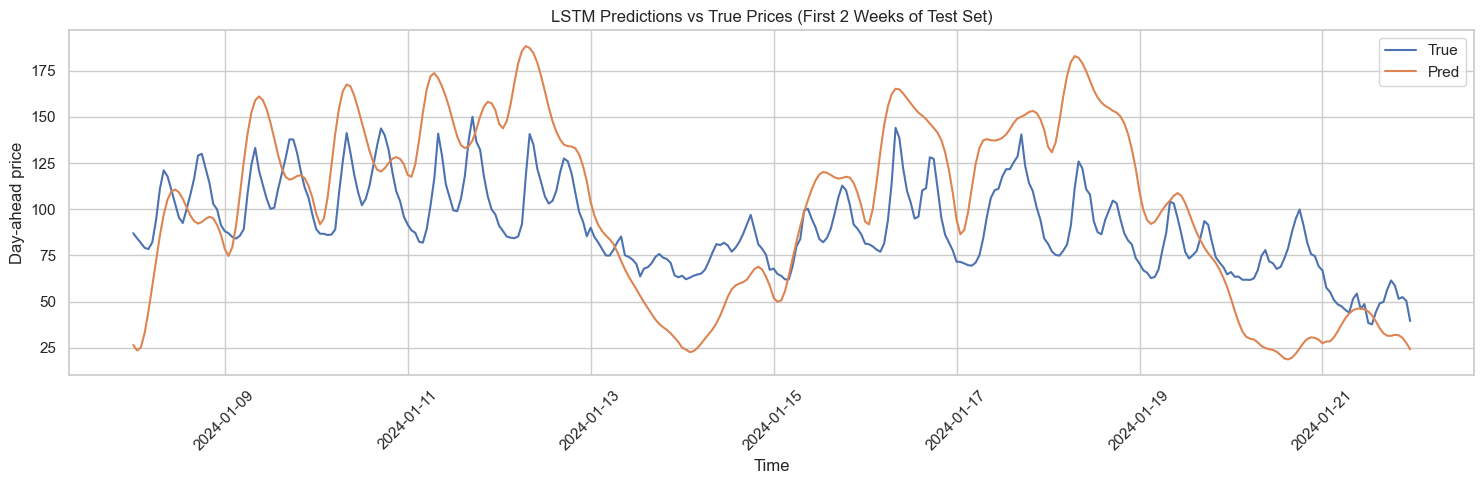

In [758]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Number of hours to plot (2 weeks)
hours_to_plot = 14 * 24  # 336

# For continuous plotting, we can take the first timestep from each 24h horizon
y_test_first = y_test[:, 0]       # first hour of each 24h prediction
y_pred_first = y_pred[:, 0]

# Corresponding timestamps from test set
test_start_idx = look_back
test_end_idx = test_start_idx + len(y_test_first)
test_timestamps = test.index[test_start_idx:test_end_idx]

# Limit to first 2 weeks
test_timestamps_2w = test_timestamps[:hours_to_plot]
y_test_2w = y_test_first[:hours_to_plot]
y_pred_2w = y_pred_first[:hours_to_plot]

# Plot
plt.figure(figsize=(15,5))
plt.plot(test_timestamps_2w, y_test_2w, label='True')
plt.plot(test_timestamps_2w, y_pred_2w, label='Pred')
plt.title("LSTM Predictions vs True Prices (First 2 Weeks of Test Set)")
plt.xlabel("Time")
plt.ylabel("Day-ahead price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/Users/spoorthysiddannaiah/Downloads/terra_one_coding/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - loss: 0.0108 - val_loss: 0.0017
Epoch 2/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 3/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 4/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 5/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 7/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0014 - val_loss: 0.0013
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Test RMSE: 55.56
Test MAE: 27.79
Test R²: 0.2689


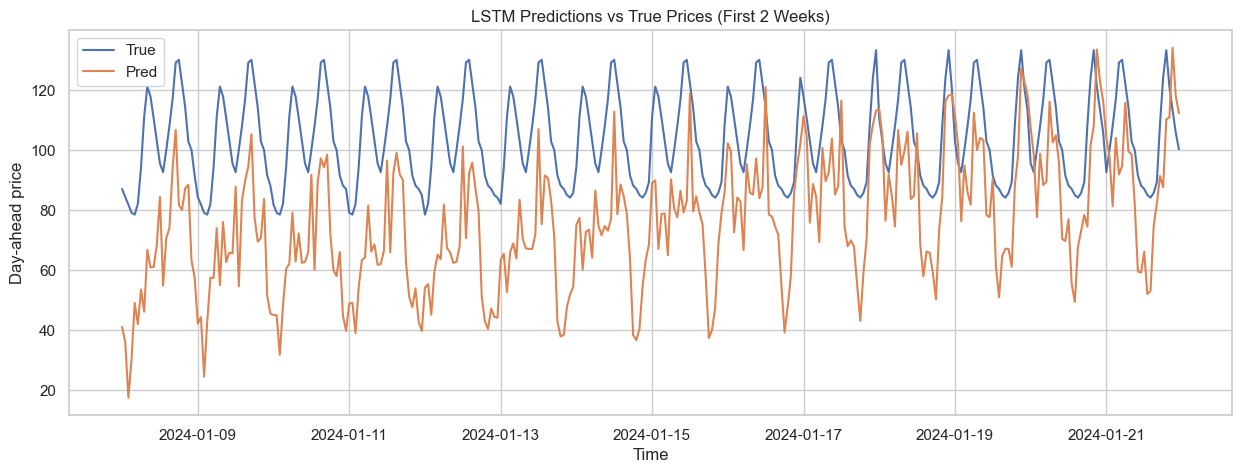

In [759]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# 1. Load and prepare df
# -------------------------------
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# -------------------------------
# 2. Feature Engineering
# -------------------------------
df_feat = df.copy()

# Time-based features
df_feat['hour'] = df_feat.index.hour
df_feat['weekday'] = df_feat.index.weekday
df_feat['month'] = df_feat.index.month
df_feat['is_weekend'] = (df_feat['weekday'] >= 5).astype(int)

# Holiday flag
cal = calendar()
holidays = cal.holidays(start=df_feat.index.min(), end=df_feat.index.max())
df_feat['is_holiday'] = df_feat.index.normalize().isin(holidays).astype(int)

# Net load
df_feat['net_load'] = df_feat['demand-forecast'] - (df_feat['solar-forecast'] + df_feat['wind-forecast'])

# -------------------------------
# 2a. Sin/Cos cyclical features
# -------------------------------
df_feat['hour_sin'] = np.sin(2 * np.pi * df_feat['hour'] / 24)
df_feat['hour_cos'] = np.cos(2 * np.pi * df_feat['hour'] / 24)
df_feat['weekday_sin'] = np.sin(2 * np.pi * df_feat['weekday'] / 7)
df_feat['weekday_cos'] = np.cos(2 * np.pi * df_feat['weekday'] / 7)
df_feat['month_sin'] = np.sin(2 * np.pi * df_feat['month'] / 12)
df_feat['month_cos'] = np.cos(2 * np.pi * df_feat['month'] / 12)

# -------------------------------
# 2b. Lag and rolling features
# -------------------------------
def create_lags_rolls(df, col, lags=[24,48,72,168]):
    for lag in lags:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)
    df[f'{col}_rollmean168'] = df[col].rolling(168).mean()
    return df

for c in ['day-ahead-auction-price', 'demand-forecast', 'solar-forecast', 'wind-forecast', 'net_load']:
    df_feat = create_lags_rolls(df_feat, c)

# Drop initial rows with NaNs due to lagging
df_feat = df_feat.dropna()

# -------------------------------
# 3. Train / Val / Test split
# -------------------------------
train = df_feat[df_feat.index.year < 2023]
val = df_feat[df_feat.index.year == 2023]
test = df_feat[df_feat.index.year == 2024]

# -------------------------------
# 4. Feature selection
# -------------------------------
feature_cols = [
    'demand-forecast', 'solar-forecast', 'wind-forecast', 'net_load',
    'hour_sin','hour_cos','weekday_sin','weekday_cos','month_sin','month_cos',
    'is_weekend','is_holiday',
    'day-ahead-auction-price_lag24','day-ahead-auction-price_lag48',
    'day-ahead-auction-price_lag72','day-ahead-auction-price_lag168',
    'demand-forecast_lag24','demand-forecast_lag48','demand-forecast_lag72','demand-forecast_lag168',
    'solar-forecast_lag24','solar-forecast_lag48','solar-forecast_lag72','solar-forecast_lag168',
    'wind-forecast_lag24','wind-forecast_lag48','wind-forecast_lag72','wind-forecast_lag168',
    'net_load_lag24','net_load_rollmean168',
    'day-ahead-auction-price_rollmean168'
]
target_col = 'day-ahead-auction-price'

# -------------------------------
# 5. Sequence creation
# -------------------------------
look_back = 24*7
horizon = 24

def create_sequences(data, feature_cols, target_col=target_col, look_back=look_back, horizon=horizon):
    X, y = [], []
    for i in range(look_back, len(data) - horizon + 1):
        X.append(data[feature_cols].iloc[i-look_back:i].values)
        y.append(data[target_col].iloc[i:i+horizon].values)
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train, feature_cols)
X_val, y_val = create_sequences(val, feature_cols)
X_test, y_test = create_sequences(test, feature_cols)

# -------------------------------
# 6. Scaling
# -------------------------------
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

nsamples, ntimesteps, nfeatures = X_train.shape
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, nfeatures)).reshape(nsamples, ntimesteps, nfeatures)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, nfeatures)).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, nfeatures)).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# -------------------------------
# 7. Build LSTM
# -------------------------------
model = Sequential([
    LSTM(64, input_shape=(look_back, len(feature_cols)), return_sequences=False),
    Dense(horizon)
])
model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50, batch_size=64, callbacks=[early_stop], verbose=1
)

# -------------------------------
# 8. Evaluate
# -------------------------------
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")

# -------------------------------
# 9. Plot first 2 weeks of test
# -------------------------------
plt.figure(figsize=(15,5))
# first 2 weeks = 14*24=336 points
plt.plot(test.index[look_back:look_back+336], y_test.flatten()[:336], label='True')
plt.plot(test.index[look_back:look_back+336], y_pred.flatten()[:336], label='Pred')
plt.title("LSTM Predictions vs True Prices (First 2 Weeks)")
plt.xlabel("Time")
plt.ylabel("Day-ahead price")
plt.legend()
plt.show()


In [767]:
def create_sequences_day_ahead(df, feature_cols, forecast_cols, target_col, look_back=168, horizon=24):
    X, y, times = [], [], []
    
    for i in range(look_back, len(df) - horizon):
        # 1️⃣ Past 7 days (168 hours)
        past_block = df[feature_cols].iloc[i - look_back:i].values  # shape (168, n_features)
        
        # 2️⃣ Future forecast (next 24 hours)
        # Initialize with zeros for all features
        future_block = np.zeros((horizon, len(feature_cols)))
        forecast_vals = df[forecast_cols].iloc[i:i + horizon].values
        
        # Fill only the forecast features
        for j, f in enumerate(forecast_cols):
            if f in feature_cols:
                col_idx = feature_cols.index(f)
                future_block[:, col_idx] = forecast_vals[:, j]
        
        # 3️⃣ Combine past + forecast
        full_block = np.concatenate([past_block, future_block], axis=0)
        X.append(full_block)
        
        # 4️⃣ Target = next 24h prices
        y.append(df[target_col].iloc[i:i + horizon].values)
        times.append(df.index[i + horizon - 1])
    
    return np.array(X), np.array(y), times


In [768]:
forecast_cols = ['demand-forecast', 'solar-forecast', 'wind-forecast', 'temperature-forecast']
X_train, y_train, t_train = create_sequences_day_ahead(train, feature_cols, forecast_cols, target_col)
X_val, y_val, t_val = create_sequences_day_ahead(val, feature_cols, forecast_cols, target_col)
X_test, y_test, t_test = create_sequences_day_ahead(test, feature_cols, forecast_cols, target_col)

print(X_train.shape, y_train.shape)
# Example → (n_samples, 192, 30)


(25943, 192, 27) (25943, 24)


Built samples: (43488, 169, 11) (43488,)
Split shapes:
 X_train: (25944, 169, 11) y_train: (25944,)
 X_val:   (8760, 169, 11) y_val: (8760,)
 X_test:  (8784, 169, 11) y_test: (8784,)
Epoch 1/100


/Users/spoorthysiddannaiah/Downloads/terra_one_coding/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



406/406 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - loss: 0.0526 - val_loss: 0.0258
Epoch 2/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 33s 80ms/step - loss: 0.0302 - val_loss: 0.0213
Epoch 3/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - loss: 0.0200 - val_loss: 0.0207
Epoch 4/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - loss: 0.0184 - val_loss: 0.0229
Epoch 5/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - loss: 0.0176 - val_loss: 0.0209
Epoch 6/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - loss: 0.0171 - val_loss: 0.0223
Epoch 7/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - loss: 0.0168 - val_loss: 0.0214
Epoch 8/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - loss: 0.0165 - val_loss: 0.0230
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Test RMSE: 51.62, MAE: 22.49, R2: 0.3592


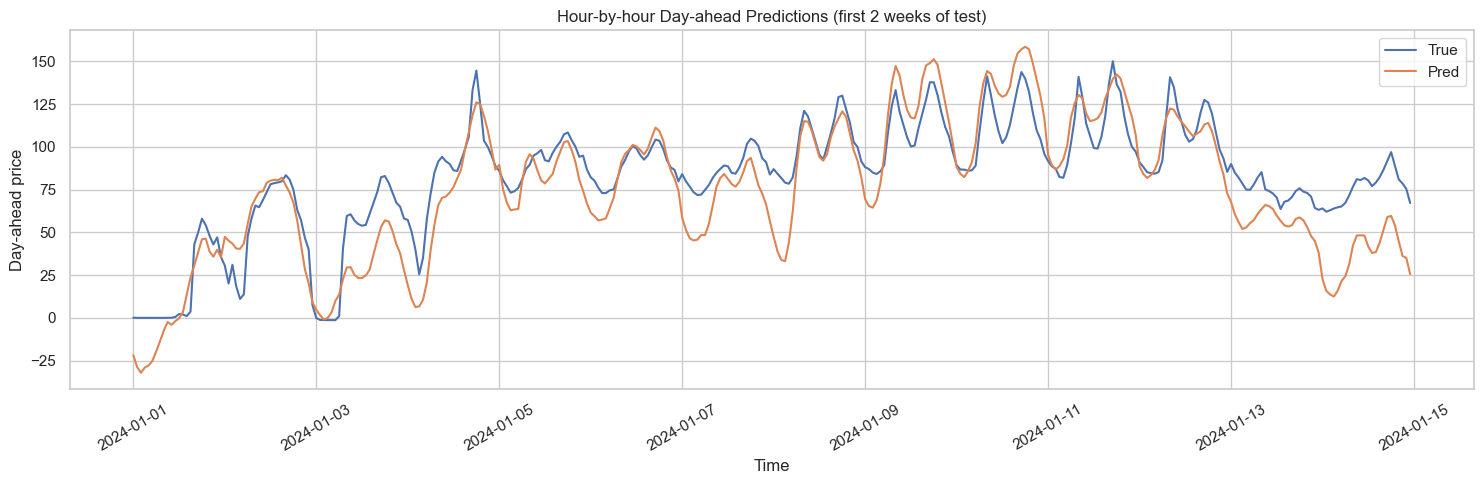

In [772]:
# Full, careful pipeline for hour-by-hour (one-step) day-ahead prediction
# - Uses past 7 days (168h) ending at auction time (previous day 12:00)
# - Adds forecast features for the target hour (available at auction)
# - No leakage of same-day actual prices

import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# Assumptions:
# - df: your DataFrame, indexed by 'contract-delivery' (timezone-aware timestamps)
# - df contains columns:
#     'day-ahead-auction-price' (target),
#     'demand-forecast', 'solar-forecast', 'wind-forecast',
#     'temperature-forecast' (optional, used below if present)
# - All hourly timestamps present (no big gaps). If small gaps exist, handle separately.
# -------------------------------

# 0. Basic setup
df = df.copy()
df.index = pd.to_datetime(df.index)   # ensure datetime index
df = df.sort_index()

# Add time and cyclical features (these are OK)
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['is_weekend'] = (df['weekday'] >= 5).astype(int)
cal = calendar()
holidays = cal.holidays(start=df.index.min(), end=df.index.max())
df['is_holiday'] = df.index.normalize().isin(holidays).astype(int)

# net_load (example)
df['net_load'] = df['demand-forecast'] - (df['solar-forecast'] + df['wind-forecast'])

# sin/cos encoding for hour/month (optional but helpful)
df['hour_sin'] = np.sin(2*np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi * df['hour']/24)
df['month_sin'] = np.sin(2*np.pi * df['month']/12)
df['month_cos'] = np.cos(2*np.pi * df['month']/12)

# -------------------------------
# Parameters: lookback and horizon
# -------------------------------
look_back = 24 * 7     # 168 hours of history ending at auction time
horizon = 24           # day-ahead hours (we will produce one sample per hour)
# However for one-step model: horizon is 1 (we build a separate sample per hour)
# We still use the auction-time history of 168 hours.

# forecast columns that are available at auction for the target hour
forecast_cols = ['demand-forecast', 'solar-forecast', 'wind-forecast']
# if you have temperature-forecast, include it:
if 'temperature-forecast' in df.columns:
    forecast_cols.append('temperature-forecast')

# feature columns (the full feature vector for each time step)
# We'll include historical feature set that is available for the past timesteps.
base_past_features = [
    'day-ahead-auction-price',    # past actual prices (only historical)
    'demand-forecast',            # these are present historically too
    'solar-forecast',
    'wind-forecast',
    'net_load',
    'hour_sin','hour_cos','month_sin','month_cos',
    'is_weekend','is_holiday'
]
# ensure all base features exist
for c in base_past_features:
    if c not in df.columns:
        raise KeyError(f"Required column '{c}' not found in df")

# final feature_cols (used to build a per-timestep vector)
feature_cols = list(base_past_features)  # this determines the column order inside sequences

n_features = len(feature_cols)

# -------------------------------
# Helper: get auction time for a delivery timestamp
# For delivery at date D and hour h: auction_time = (D - 1 day) at 12:00
# -------------------------------
def auction_time_for_delivery(ts):
    # ts is a Timestamp for delivery (e.g. 2024-02-22 03:00+01:00)
    # Auction time is previous calendar day at 12:00 (local). We'll keep timezone as-is.
    delivery_date = ts.normalize()  # midnight of day D
    auction_time = delivery_date - pd.Timedelta(days=1) + pd.Timedelta(hours=12)
    # If df index uses CET offsets correctly, this will match index entries
    return auction_time

# -------------------------------
# Build samples (one sample per delivery hour)
# For each delivery timestamp t (exclude earliest days where we lack history),
# create input: past_block (168 x n_features) ending at auction_time,
# plus a single "forecast timestep" representing the forecast for that delivery hour.
# We will create sequence length = look_back + 1 (the last timestep holds forecast-only info).
# -------------------------------
def build_hourly_day_ahead_samples(df, feature_cols, forecast_cols, start_date=None, end_date=None, look_back=168):
    X_list, y_list, t_list = [], [], []
    # iterate over candidate delivery timestamps in df (these are hourly)
    # restrict to full days: we will iterate over each timestamp t, but require auction_time and look_back available
    for t in df.index:
        # auction time for day of delivery t
        auction_time = auction_time_for_delivery(t)
        # We require the auction_time to be in the index and that the lookback block is available
        if auction_time not in df.index:
            # skip if auction timestamp not present (shouldn't normally happen if index hourly)
            continue
        # end of past block is auction_time (inclusive)
        past_end = auction_time
        past_start = past_end - pd.Timedelta(hours=look_back - 1)  # inclusive block of length look_back
        if past_start not in df.index:
            # If exact start not in index, ensure the entire range exists
            # We will skip timestamps where full history isn't present
            # (optionally you could try reindexing and forward/backfill small gaps)
            continue
        # ensure index range exists
        # get past block
        past_block = df.loc[past_start:past_end, feature_cols].values   # shape (look_back, n_features)
        # now create forecast timestep vector of length n_features
        # initialize zeros, then fill forecast features positions
        forecast_vec = np.zeros((n_features,), dtype=float)
        # populate forecast columns: if forecast_col in feature_cols, place value at its index
        for fc in forecast_cols:
            if fc in feature_cols:
                idx = feature_cols.index(fc)
                forecast_vec[idx] = df.at[t, fc]  # forecast value for this delivery hour
        # Also set time-of-day cyclical features for target hour inside forecast_vec
        # fill hour_sin/hour_cos for target hour
        if 'hour_sin' in feature_cols:
            idx = feature_cols.index('hour_sin'); forecast_vec[idx] = np.sin(2*np.pi * t.hour / 24)
        if 'hour_cos' in feature_cols:
            idx = feature_cols.index('hour_cos'); forecast_vec[idx] = np.cos(2*np.pi * t.hour / 24)
        if 'month_sin' in feature_cols:
            idx = feature_cols.index('month_sin'); forecast_vec[idx] = np.sin(2*np.pi * t.month / 12)
        if 'month_cos' in feature_cols:
            idx = feature_cols.index('month_cos'); forecast_vec[idx] = np.cos(2*np.pi * t.month / 12)
        if 'is_weekend' in feature_cols:
            idx = feature_cols.index('is_weekend'); forecast_vec[idx] = int(t.weekday() >= 5)
        if 'is_holiday' in feature_cols:
            idx = feature_cols.index('is_holiday'); forecast_vec[idx] = int(t.normalize() in holidays)

        # combine: sequence length = look_back + 1
        full_seq = np.vstack([past_block, forecast_vec.reshape(1, -1)])  # shape (look_back+1, n_features)
        X_list.append(full_seq)
        # target is the actual day-ahead price at delivery time t
        y_list.append(df.at[t, 'day-ahead-auction-price'])
        t_list.append(t)
    X = np.array(X_list)   # shape (n_samples, look_back+1, n_features)
    y = np.array(y_list)   # shape (n_samples,)
    return X, y, t_list

# Build samples for full df_feat (after dropna of any earlier lagging if you used them)
# If you created lag features earlier, ensure df has no NaNs by df = df.dropna()
df_clean = df.dropna().copy()

# Optionally restrict to a date window to speed up testing
# df_clean = df_clean['2020':'2024']  # example

X_all, y_all, times = build_hourly_day_ahead_samples(df_clean, feature_cols, forecast_cols, look_back=look_back)

print("Built samples:", X_all.shape, y_all.shape)

# -------------------------------
# Split into train / val / test by timestamp (year-based)
# Each sample has an associated delivery timestamp in 'times'
# We'll create boolean masks based on the delivery timestamp's year
# -------------------------------
times_idx = pd.DatetimeIndex(times)
mask_train = times_idx.year < 2023
mask_val = times_idx.year == 2023
mask_test = times_idx.year == 2024

X_train = X_all[mask_train]
y_train = y_all[mask_train]
t_train = times_idx[mask_train]

X_val = X_all[mask_val]
y_val = y_all[mask_val]
t_val = times_idx[mask_val]

X_test = X_all[mask_test]
y_test = y_all[mask_test]
t_test = times_idx[mask_test]

print("Split shapes:")
print(" X_train:", X_train.shape, "y_train:", y_train.shape)
print(" X_val:  ", X_val.shape, "y_val:", y_val.shape)
print(" X_test: ", X_test.shape, "y_test:", y_test.shape)

# -------------------------------
# Scale features and target (fit scalers on train only)
# For X: flatten timesteps*features to 2D -> fit scaler -> reshape back
# -------------------------------
ns, seq_len, nf = X_train.shape
scaler_X = MinMaxScaler()
X_train_flat = X_train.reshape(-1, nf)
X_train_scaled_flat = scaler_X.fit_transform(X_train_flat)
X_train_scaled = X_train_scaled_flat.reshape(ns, seq_len, nf)

# val/test transform
X_val_flat = X_val.reshape(-1, nf)
X_val_scaled = scaler_X.transform(X_val_flat).reshape(X_val.shape)
X_test_flat = X_test.reshape(-1, nf)
X_test_scaled = scaler_X.transform(X_test_flat).reshape(X_test.shape)

# target scaler
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).reshape(-1,)
y_val_scaled = scaler_y.transform(y_val.reshape(-1,1)).reshape(-1,)
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).reshape(-1,)

# -------------------------------
# Build & train one-step LSTM
# input shape: (seq_len, n_features) where seq_len = look_back + 1
# -------------------------------
seq_len = X_train_scaled.shape[1]
n_features = X_train_scaled.shape[2]

model = Sequential([
    LSTM(64, input_shape=(seq_len, n_features), return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mae')

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100, batch_size=64, callbacks=[es], verbose=1
)

# -------------------------------
# Predict on test
# -------------------------------
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape(-1,)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")

# -------------------------------
# Plot: first 2 weeks of test (hour-by-hour)
# -------------------------------
hours_to_plot = 24 * 14
plt.figure(figsize=(15,5))
plt.plot(t_test[:hours_to_plot], y_test[:hours_to_plot], label='True')
plt.plot(t_test[:hours_to_plot], y_pred[:hours_to_plot], label='Pred')
plt.xlabel('Time')
plt.ylabel('Day-ahead price')
plt.title('Hour-by-hour Day-ahead Predictions (first 2 weeks of test)')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()


In [813]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [827]:
df.columns

Index(['demand-forecast', 'temperature-normal', 'temperature-forecast',
       'solar-forecast', 'day-ahead-auction-price', 'wind-forecast',
       'day-ahead-auction-time'],
      dtype='object')

In [836]:
def add_lags(df, target_cols, lags=[24, 48, 72, 168]):
    """
    Adds lag features for given target columns.
    """
    df = df.copy()
    for col in target_cols:
        for lag in lags:
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
    return df

# Columns to create lags for
lag_cols = ['day-ahead-auction-price', 'demand-forecast']

train = add_lags(train, lag_cols)
val   = add_lags(val, lag_cols)
test  = add_lags(test, lag_cols)

# Drop NaNs caused by lagging
train = train.dropna()
val   = val.dropna()
test  = test.dropna()


In [837]:
# Past features (lagged)
past_features = [
    'price_lag24', 'price_lag48', 'price_lag72', 'price_lag168',
    'demand_lag24', 'demand_lag48', 'demand_lag72', 'demand_lag168'
]

# Forecast features (renewable, demand forecasts, etc.)
forecast_features = ['solar-forecast', 'wind-forecast', 'demand-forecast']

# Target column
target_col = 'price'


In [838]:
# Past features (lagged)
past_features = [
    'day-ahead-auction-price_lag24', 'day-ahead-auction-price_lag48',
    'day-ahead-auction-price_lag72', 'day-ahead-auction-price_lag168',
    'demand-forecast_lag24', 'demand-forecast_lag48',
    'demand-forecast_lag72', 'demand-forecast_lag168'
]

# Forecast features (future/prediction inputs)
forecast_features = [
    'demand-forecast', 'temperature-normal', 'temperature-forecast',
    'solar-forecast', 'wind-forecast'
]

# Target column
target_col = 'day-ahead-auction-price'


In [839]:
look_back = 168  # past 7 days
horizon = 24     # predict next 24 hours

def create_sequences_day_ahead(df, past_features, forecast_features, target_col, look_back=168, horizon=24):
    X, y, dates = [], [], []
    
    for i in range(look_back, len(df)-horizon+1, 24):  # step by 24h
        # Past block
        past_block = df[past_features].iloc[i-look_back:i].values
        past_forecast_pad = np.zeros((look_back, len(forecast_features)))
        past_block_full = np.hstack([past_block, past_forecast_pad])
        
        # Forecast block (next horizon)
        forecast_block = df[forecast_features].iloc[i:i+horizon].values
        last_past = df[past_features].iloc[i-1].values
        past_pad_block = np.tile(last_past, (horizon,1))
        forecast_block_full = np.hstack([past_pad_block, forecast_block])
        
        # Combine past + forecast
        X_block = np.vstack([past_block_full, forecast_block_full])
        y_block = df[target_col].iloc[i:i+horizon].values
        
        X.append(X_block)
        y.append(y_block)
        dates.append(df.index[i:i+horizon])
    
    return np.array(X), np.array(y), dates


In [840]:
X_train, y_train, t_train = create_sequences_day_ahead(train, past_features, forecast_features, target_col)
X_val, y_val, t_val = create_sequences_day_ahead(val, past_features, forecast_features, target_col)
X_test, y_test, t_test = create_sequences_day_ahead(test, past_features, forecast_features, target_col)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


X_train: (1067, 192, 13) y_train: (1067, 24)
X_val: (344, 192, 13) y_val: (344, 24)
X_test: (345, 192, 13) y_test: (345, 24)


In [853]:
# Reshape for scaler
nsamples, ntimesteps, nfeatures = X_train.shape
X_train_flat = X_train.reshape(-1, nfeatures)
X_val_flat = X_val.reshape(-1, X_val.shape[2])
X_test_flat = X_test.reshape(-1, X_test.shape[2])

# Scale input features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train_flat).reshape(nsamples, ntimesteps, nfeatures)
X_val_scaled = scaler_X.transform(X_val_flat).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test_flat).reshape(X_test.shape)

# Target: here we can leave as is, or scale if needed
y_train_scaled = y_train
y_val_scaled = y_val
y_test_scaled = y_test


In [860]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=False))
model.add(Dense(y_train_scaled.shape[1]))  # horizon = 24
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


/Users/spoorthysiddannaiah/Downloads/terra_one_coding/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                  │ (None, 192, 128)       │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,672 (483.09 KB)

 Trainable params: 123,672 (483.09 KB)

 Non-trainable params: 0 (0.00 B)

In [861]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 30481.5469 - mae: 121.0401 - val_loss: 10502.8574 - val_mae: 92.4688
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 27724.2402 - mae: 112.7957 - val_loss: 10033.8164 - val_mae: 90.1694
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 27691.8730 - mae: 113.2409 - val_loss: 9615.8477 - val_mae: 88.0913
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 29275.5918 - mae: 115.5499 - val_loss: 9231.2510 - val_mae: 86.1526
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 27153.5605 - mae: 111.4182 - val_loss: 8868.1484 - val_mae: 84.2953
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 27367.5312 - mae: 108.3071 - val_loss: 8521.0879 - val_mae: 82.4919
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 28998.7930 - mae: 111.7854 - val_loss: 8181.7085 - val_mae: 80.6999
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 28432.9512 - mae: 108.5231 - val_loss: 786

In [865]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_pred_scaled  # if target not scaled

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Flatten for metrics
y_test_flat = y_test.reshape(-1)
y_pred_flat = y_pred.reshape(-1)

mae = mean_absolute_error(y_test_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))  # manually take sqrt
r2 = r2_score(y_test_flat, y_pred_flat)

print(f"Test MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test MAE: 35.129, RMSE: 65.135, R2: 0.026


In [866]:
# 2 weeks = 14*24 hours = 336
n_hours = 14*24
y_true_2w = y_test_flat[:n_hours]
y_pred_2w = y_pred_flat[:n_hours]

# Flatten datetime list
dates_2w = np.concatenate([d[:24] for d in t_test[:14]])

df_compare = pd.DataFrame({
    'datetime': dates_2w,
    'true': y_true_2w,
    'pred': y_pred_2w,
    'error': y_true_2w - y_pred_2w
})

print(df_compare)


                     datetime  true  pred  error
0   2024-01-22 00:00:00+01:00 36.66 79.88 -43.22
1   2024-01-22 01:00:00+01:00 22.24 78.69 -56.45
2   2024-01-22 02:00:00+01:00 18.62 78.76 -60.14
3   2024-01-22 03:00:00+01:00  5.04 79.90 -74.86
4   2024-01-22 04:00:00+01:00  5.06 87.50 -82.44
..                        ...   ...   ...    ...
331 2024-02-04 19:00:00+01:00 36.17 92.05 -55.88
332 2024-02-04 20:00:00+01:00 29.05 89.72 -60.67
333 2024-02-04 21:00:00+01:00 24.52 85.51 -60.99
334 2024-02-04 22:00:00+01:00 24.44 84.08 -59.64
335 2024-02-04 23:00:00+01:00  0.57 82.16 -81.59

[336 rows x 4 columns]


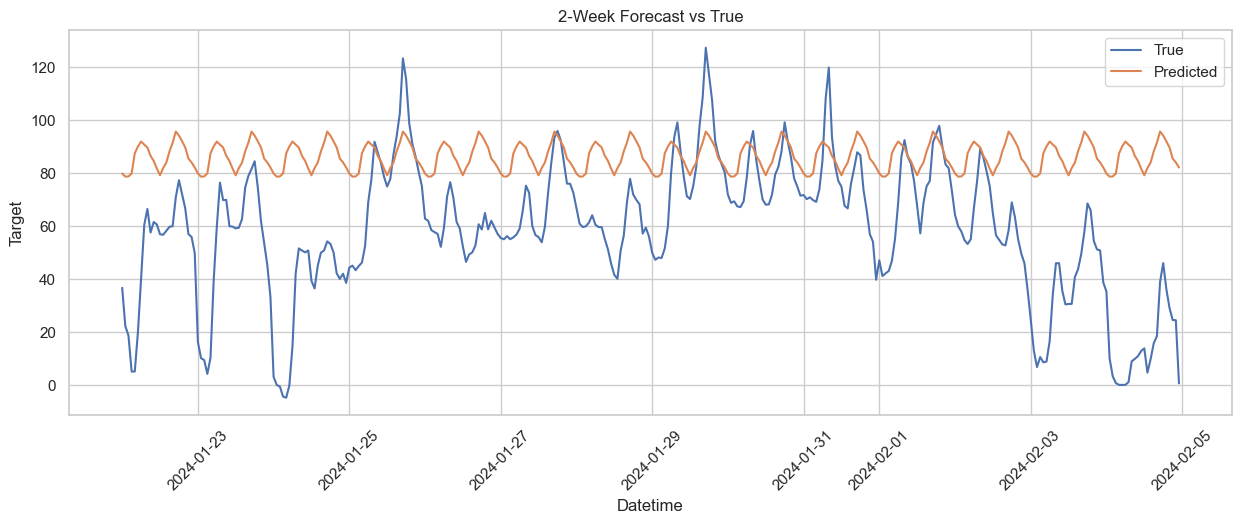

In [867]:
plt.figure(figsize=(15,5))
plt.plot(df_compare['datetime'], df_compare['true'], label='True')
plt.plot(df_compare['datetime'], df_compare['pred'], label='Predicted')
plt.xlabel('Datetime')
plt.ylabel('Target')
plt.title('2-Week Forecast vs True')
plt.legend()
plt.xticks(rotation=45)
plt.show()
